In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import getpass

In [2]:
def idx_to_time(arr, samp_rate):
    print(len(arr))
    return np.arange(len(arr))/samp_rate 

In [3]:
def matched_filter(ref_filename, sig_filename, pulse_t, samp_rate, start_time, stop_time, flip = False):
    
    start_samp = int(start_time*samp_rate)
    stop_samp = int(stop_time*samp_rate)
    num_samp = stop_samp - start_samp
    
    t = np.linspace(0, num_samp/samp_rate, num = int(num_samp))
    t_corr = np.linspace(-num_samp/samp_rate, num_samp/samp_rate, num = int(2*num_samp-1))
    
    #Extracting and truncating signal data
    ref = np.fromfile(open(ref_filename), dtype="complex64")[start_samp:stop_samp]
    sig = np.fromfile(open(sig_filename), dtype="complex64")[start_samp:stop_samp]
    
    #Correlating and flipping the signal (or not)
    if flip == False:
        corr = scipy.signal.correlate(sig, ref)
    if flip == True:
        corr = scipy.signal.correlate(-sig, ref)
    
    #Self-correlating the reference signal
    self_corr = scipy.signal.correlate(ref, ref)
    
    #Raw truncated signal plot
    f1, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t, ref)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference Chirp")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t, sig)
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title('Delayed Signal Chirp')
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f1.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Self correlation and signal correlation plot
    f2, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference self-correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t_corr, corr, color = '#ff7f0e')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Reference and signal correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f2.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Superimposed self/signal correlation with zoom plot
    f3, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr, label = 'Reference')
    ax[0].plot(t_corr, corr, label = 'Rignal')
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Ampltidue")
    ax[0].set_title("Self-correlation and signal correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[0].legend()

    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], self_corr[int(num_samp-50):int(num_samp+50)], 
                 label = 'Reference')
    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], corr[int(num_samp-50):int(num_samp+50)], 
                label = 'Signal')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Up-close signal and self- correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].legend()
    
    f3.subplots_adjust(wspace = 0)
    
    plt.show()
    
    print(scipy.signal.find_peaks(self_corr[int(num_samp-50):int(num_samp+50)], height = 0.5))
    print(scipy.signal.find_peaks(corr[int(num_samp-50):int(num_samp+50)], height = 0.5))

/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


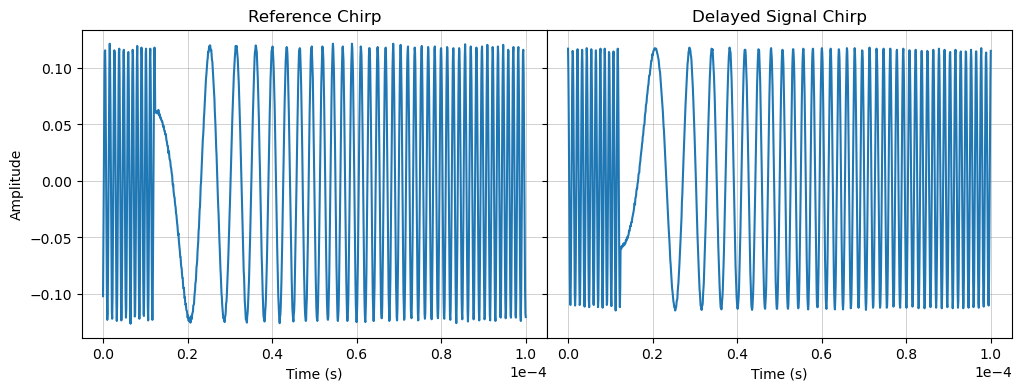

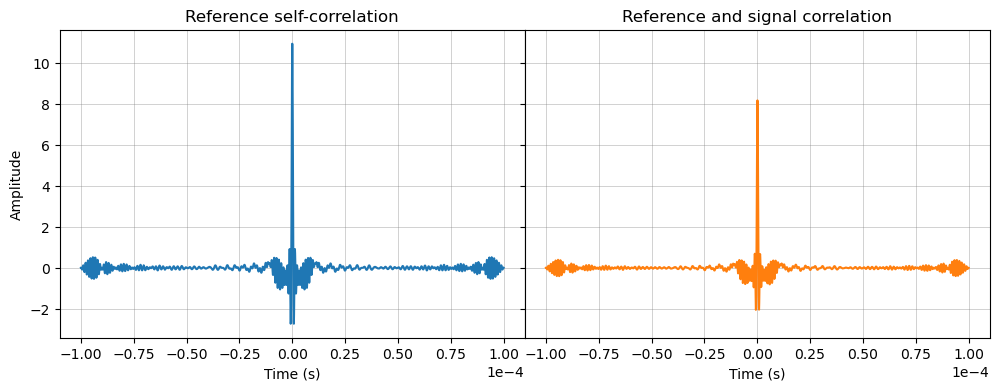

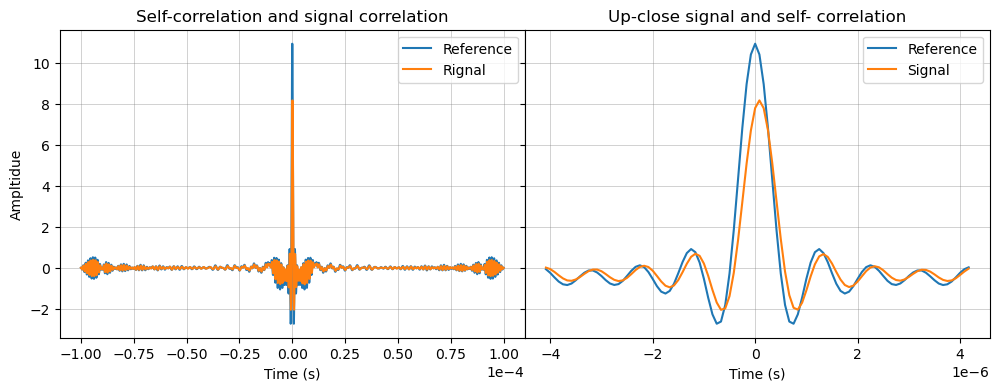

(array([34, 49, 64]), {'peak_heights': array([ 0.92667806, 10.94112396,  0.92667806])})
(array([35, 50, 65]), {'peak_heights': array([0.69774324, 8.17733765, 0.68154085])})


/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [4]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log01", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = True)

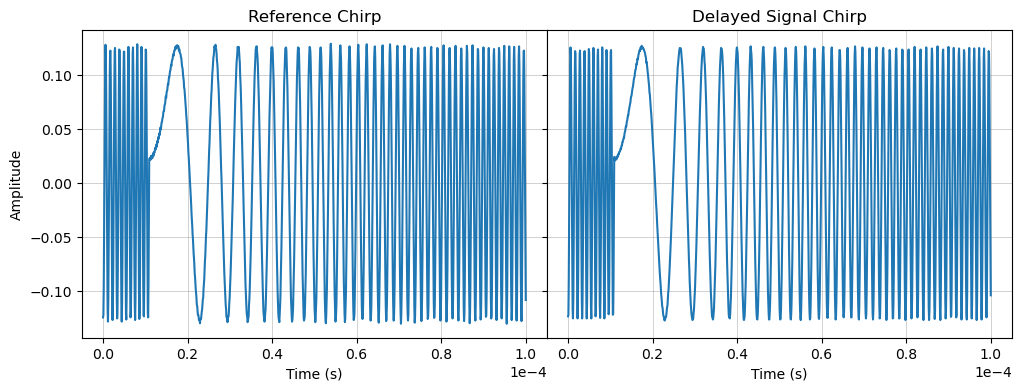

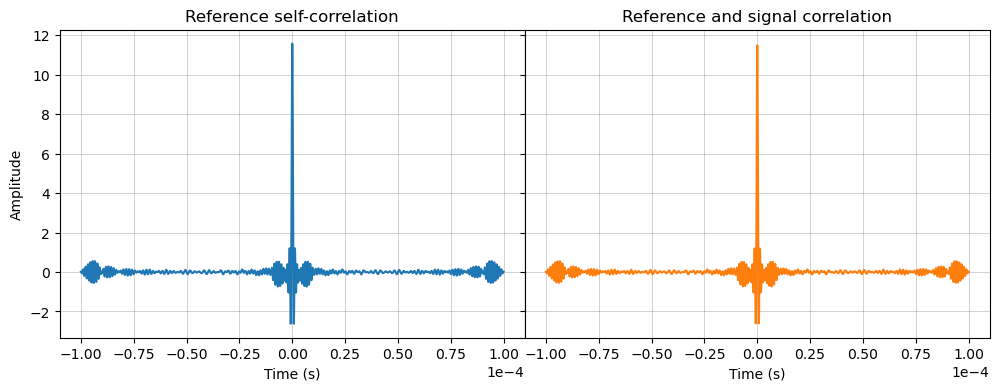

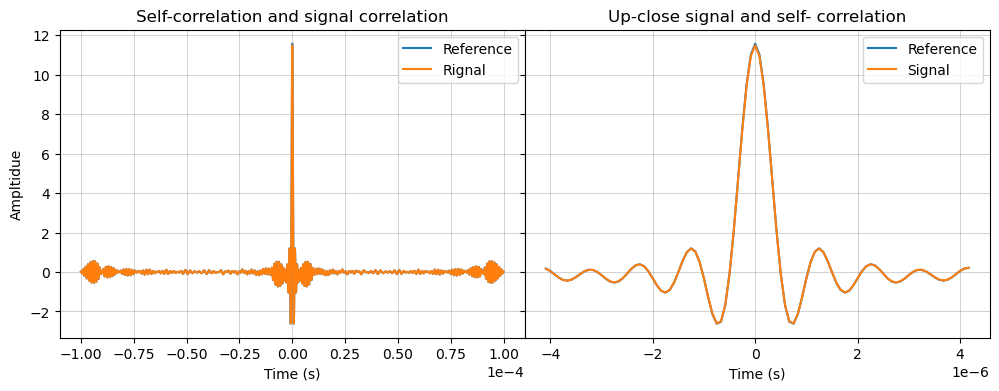

(array([34, 49, 64]), {'peak_heights': array([ 1.19943142, 11.56917191,  1.19943142])})
(array([34, 49, 64]), {'peak_heights': array([ 1.18825734, 11.48204708,  1.18657088])})


In [5]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log02", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log02", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

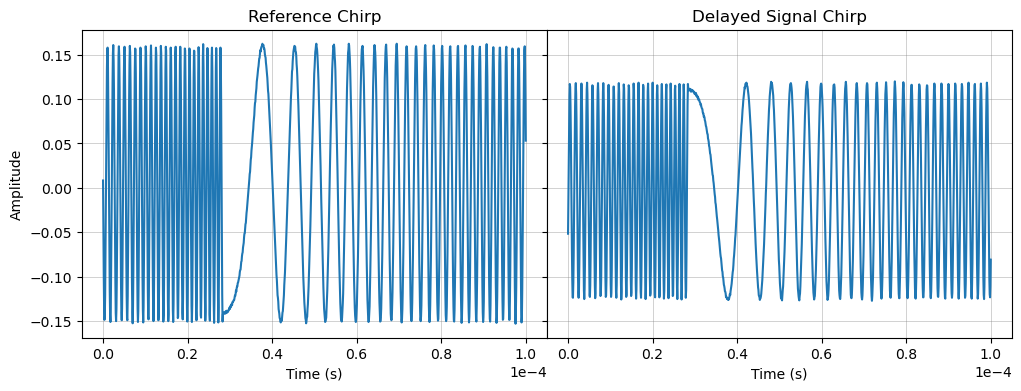

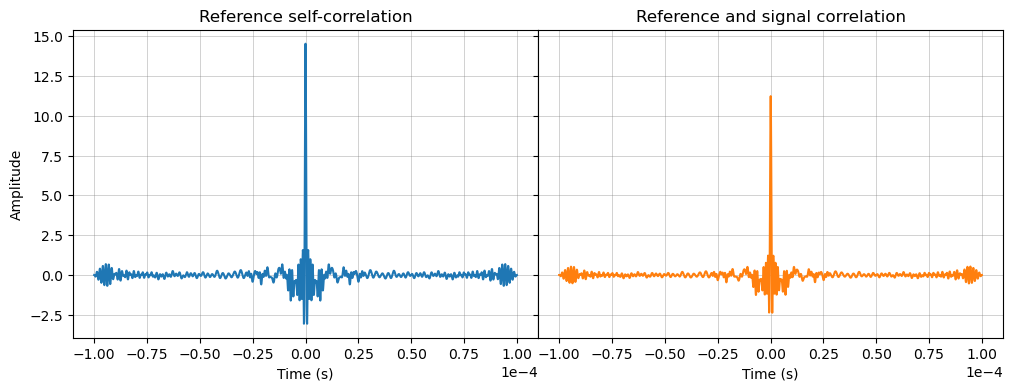

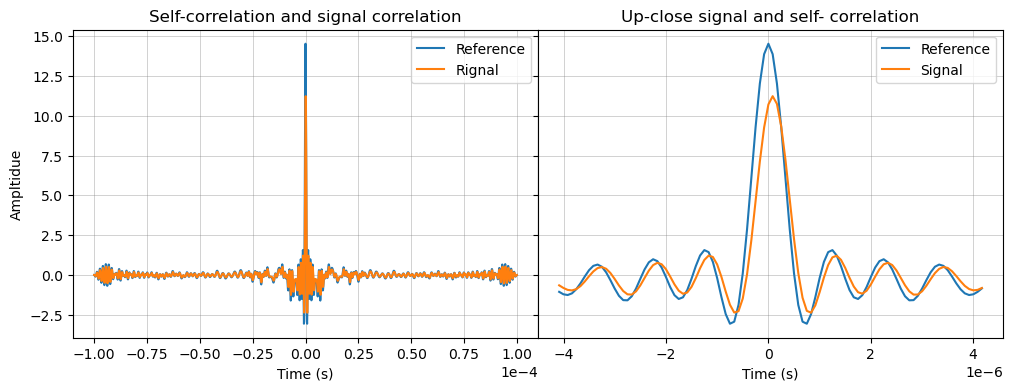

(array([ 9, 22, 34, 49, 64, 76, 89]), {'peak_heights': array([ 0.65519959,  0.98880464,  1.56336462, 14.52357483,  1.56336462,
        0.98880464,  0.65519959])})
(array([23, 35, 50, 65, 77, 90]), {'peak_heights': array([ 0.76501721,  1.2160393 , 11.22910118,  1.2095505 ,  0.7670188 ,
        0.50221443])})


In [6]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log03", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log03", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = True)

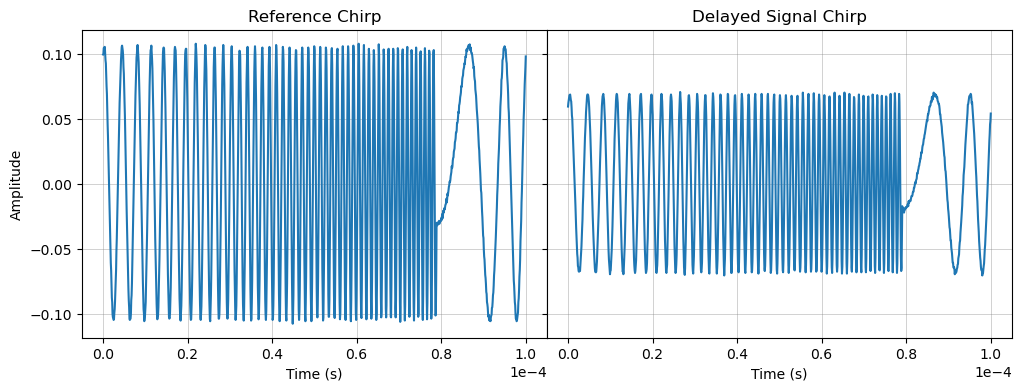

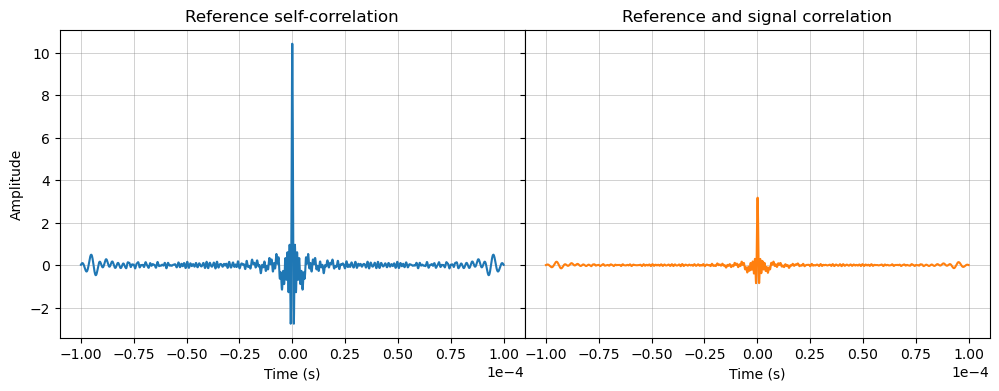

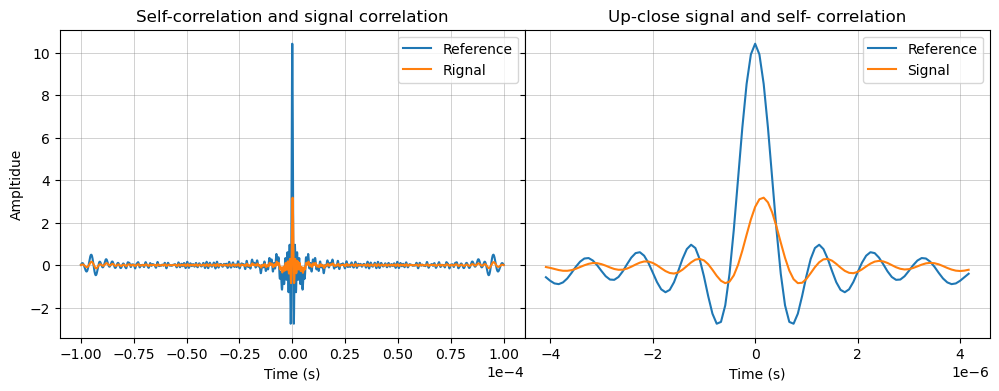

(array([22, 34, 49, 64, 76]), {'peak_heights': array([ 0.60851258,  0.95989209, 10.41642857,  0.95989209,  0.60851258])})
(array([51]), {'peak_heights': array([3.17366838])})


In [7]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log04", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log04", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

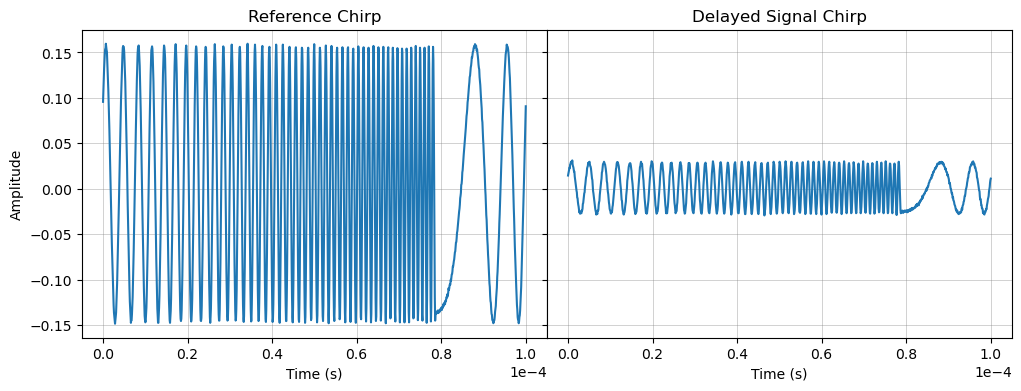

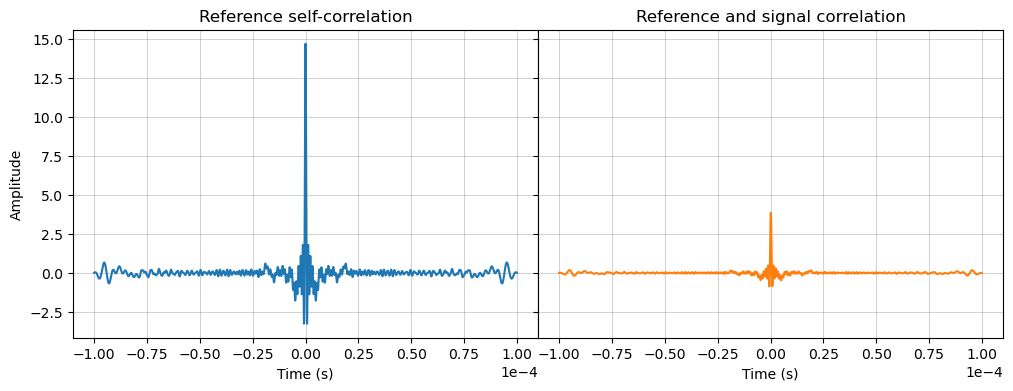

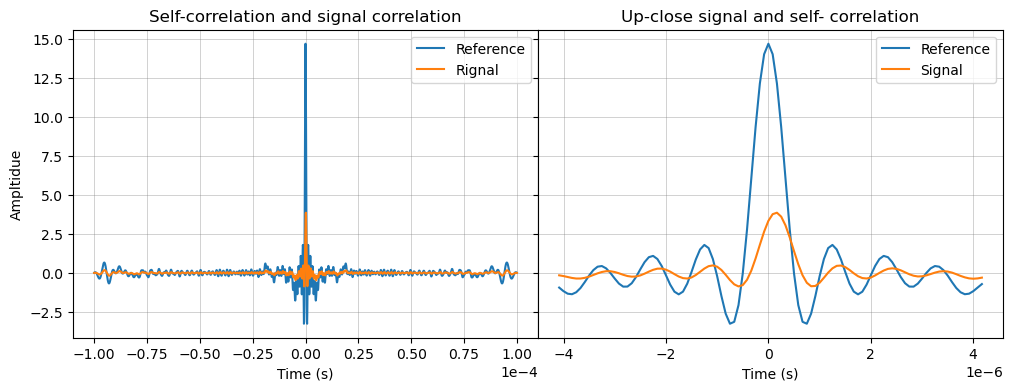

(array([22, 34, 49, 64, 76]), {'peak_heights': array([ 1.09030414,  1.79150259, 14.66939068,  1.79150259,  1.09030414])})
(array([51]), {'peak_heights': array([3.8534739])})


In [8]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log05", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log05", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

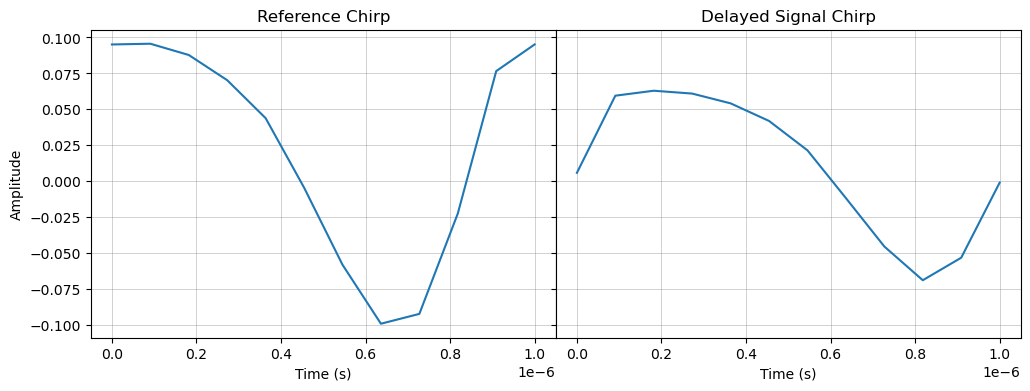

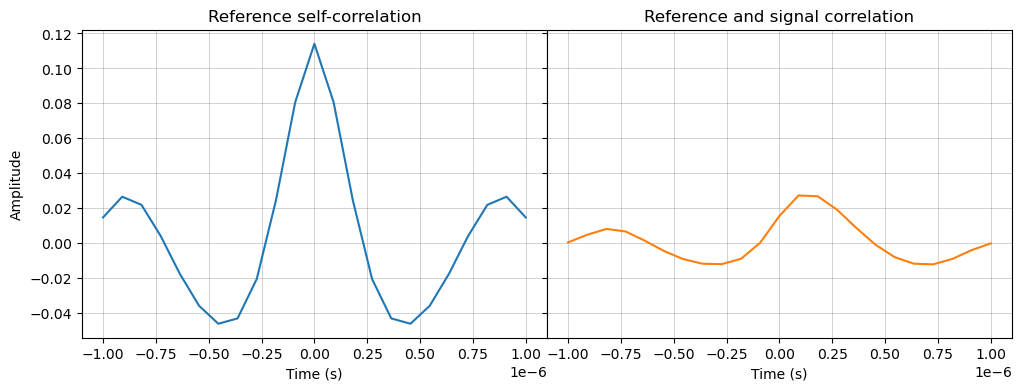

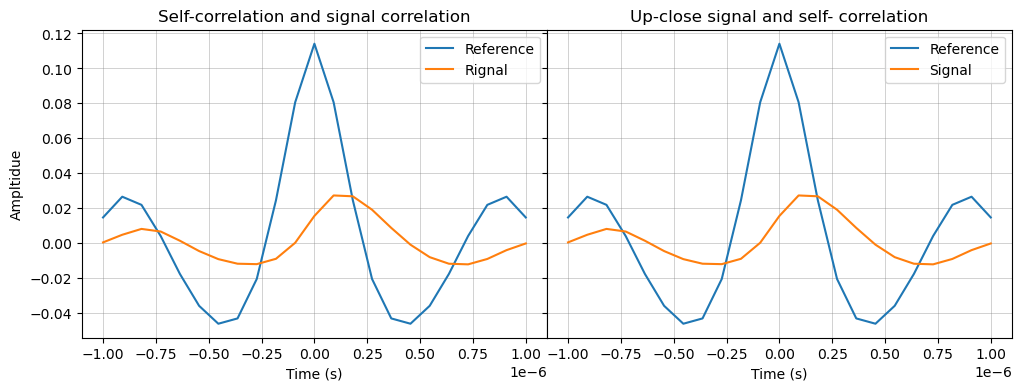

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [9]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log06", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log06", 
               1/10000, 12e6, 0.1, 0.1+(1/1e6), flip = False)

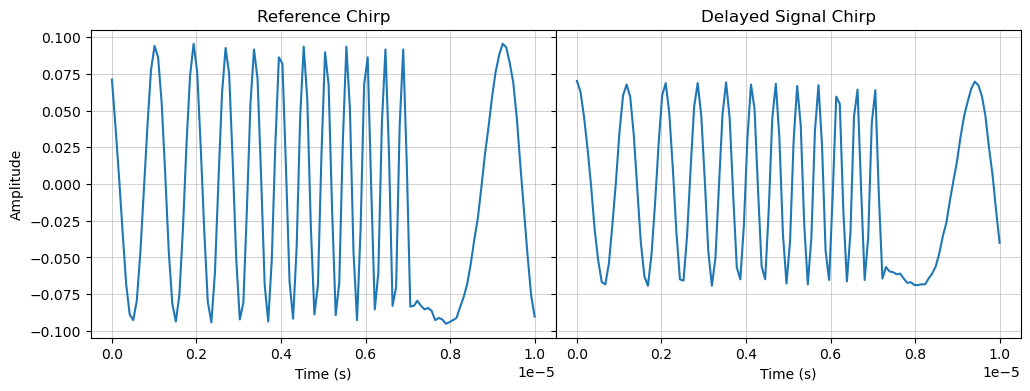

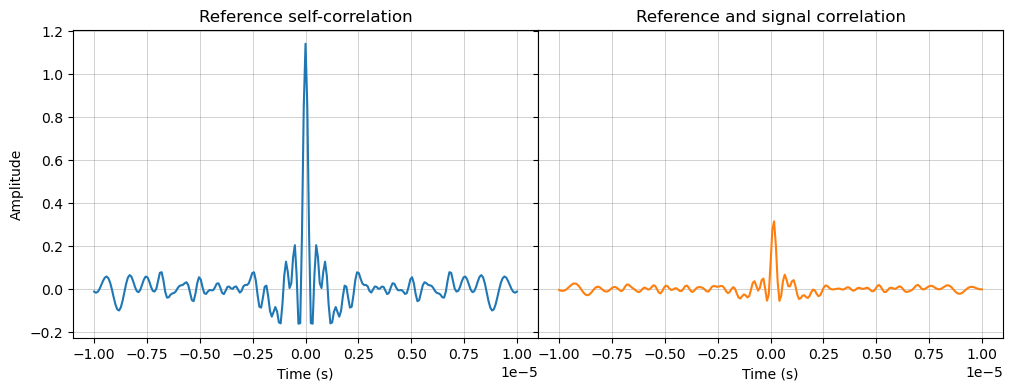

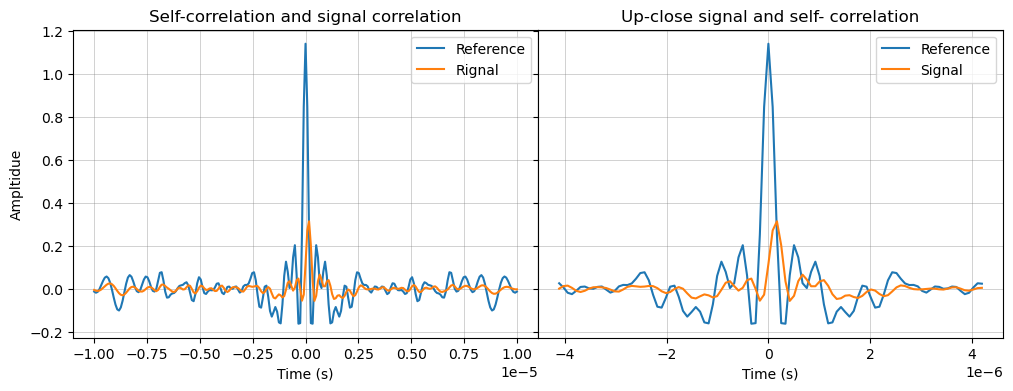

(array([49]), {'peak_heights': array([1.14080107])})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [10]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log07", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log07", 
               1/10000, 12e6, 0.1, 0.1+(1/1e5), flip = False)

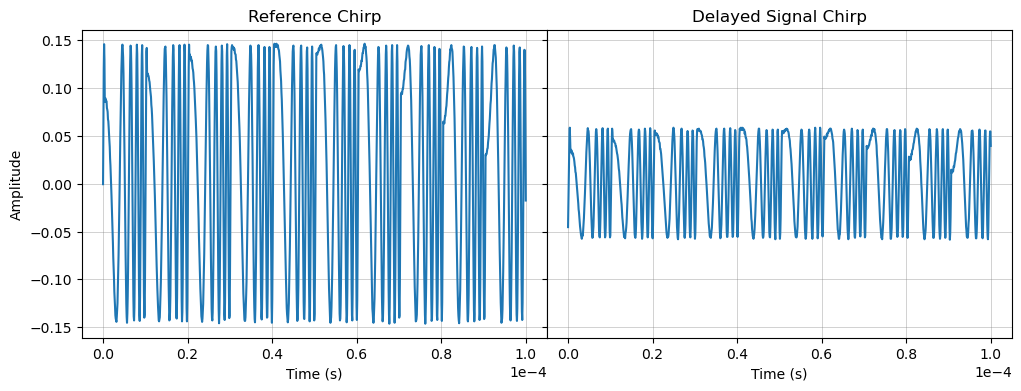

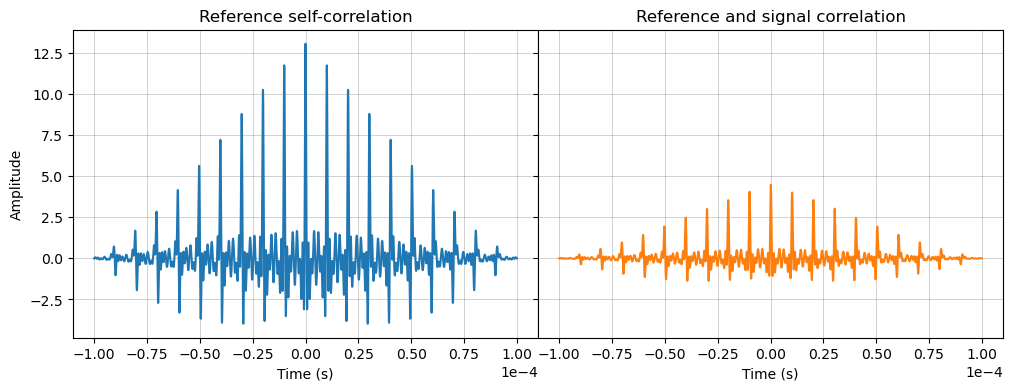

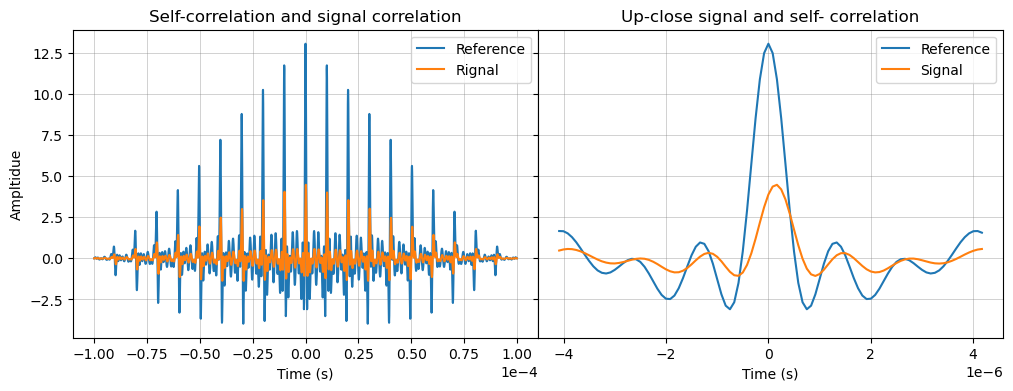

(array([33, 49, 65, 98]), {'peak_heights': array([ 0.96723855, 13.05313587,  0.96723855,  1.6633563 ])})
(array([ 2, 51]), {'peak_heights': array([0.57343769, 4.47417736])})


In [11]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log08", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log08", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

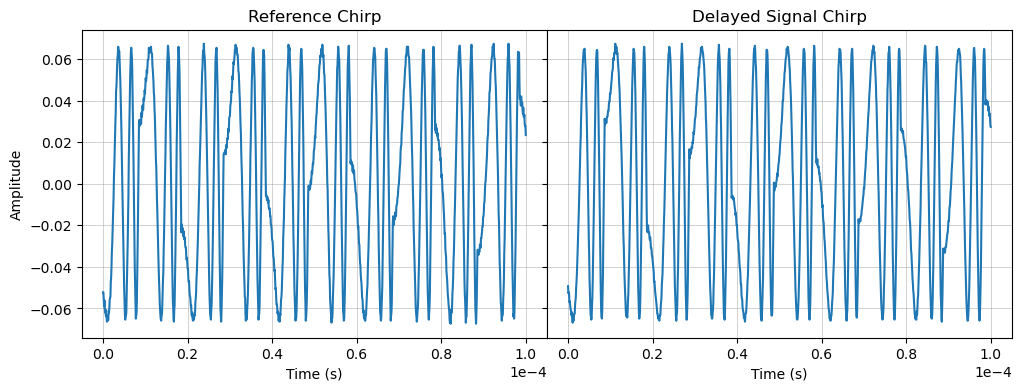

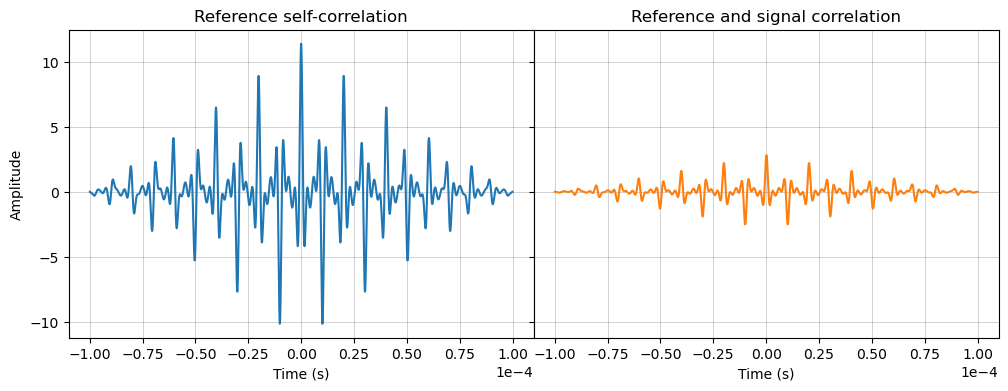

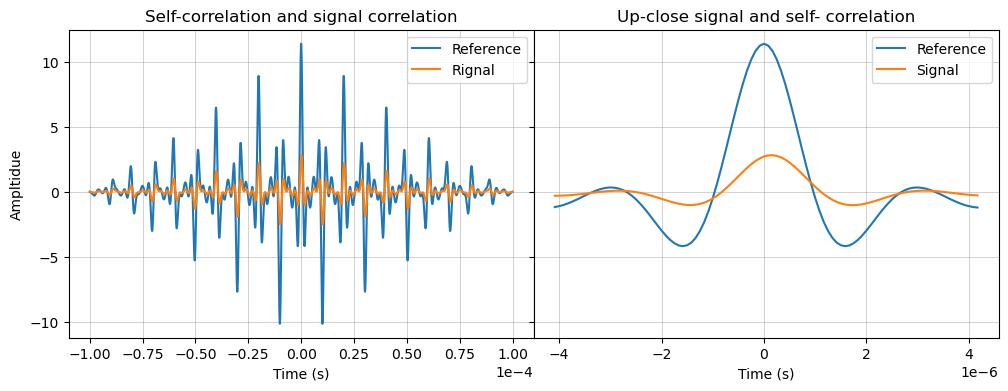

(array([49]), {'peak_heights': array([11.38639259])})
(array([51]), {'peak_heights': array([2.80968738])})


In [12]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log09", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log09", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

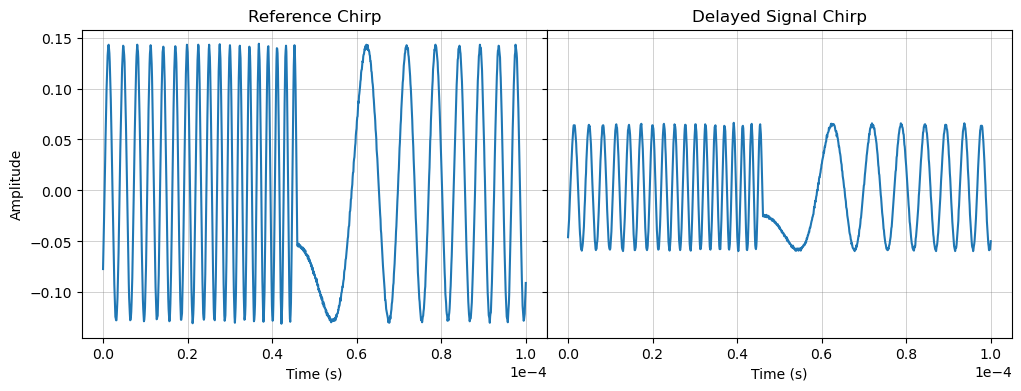

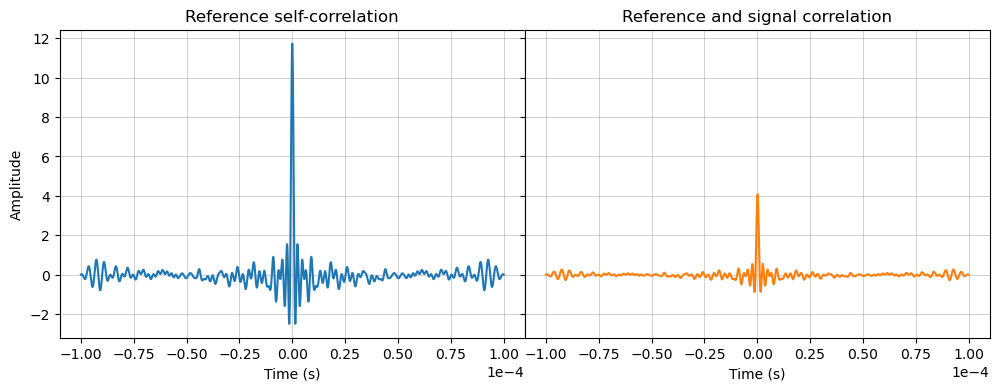

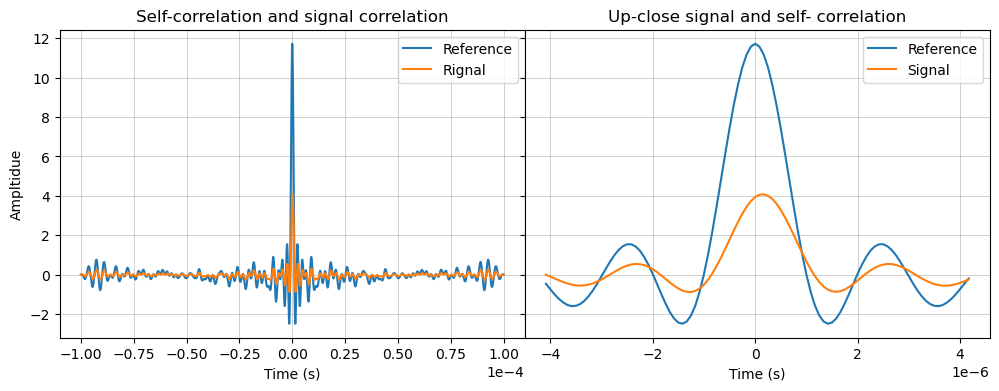

(array([19, 49, 79]), {'peak_heights': array([ 1.5482465 , 11.71983624,  1.5482465 ])})
(array([21, 51, 80]), {'peak_heights': array([0.54636794, 4.08006001, 0.54807019])})


In [13]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log10", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log10", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

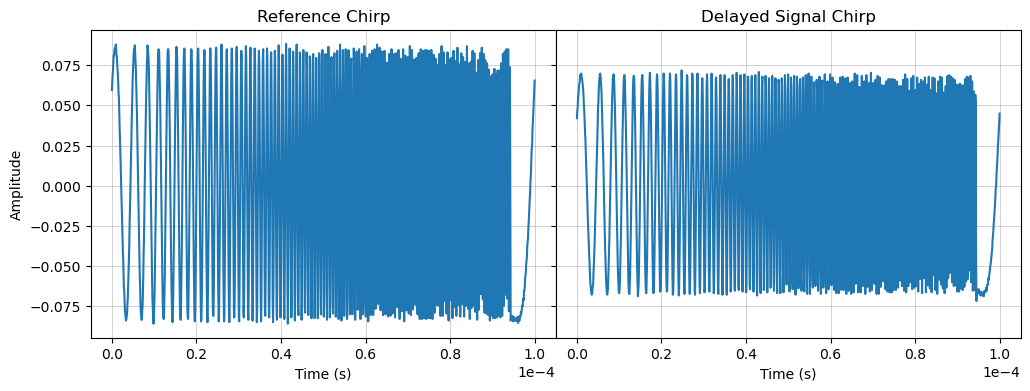

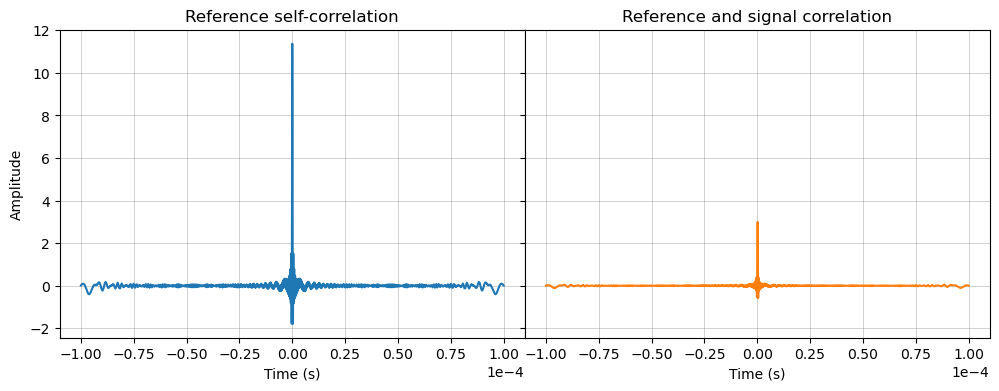

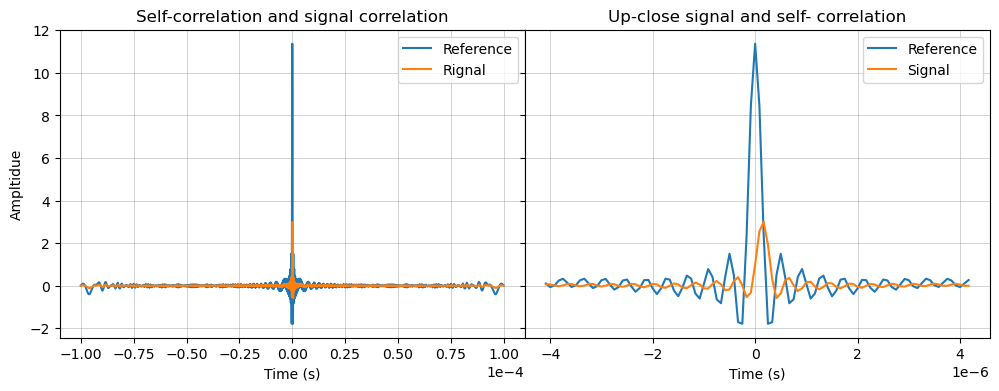

(array([38, 43, 49, 55, 60]), {'peak_heights': array([ 0.78274858,  1.50016487, 11.37217903,  1.50016487,  0.78274858])})
(array([51]), {'peak_heights': array([2.99874043])})


In [14]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log11", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log11", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

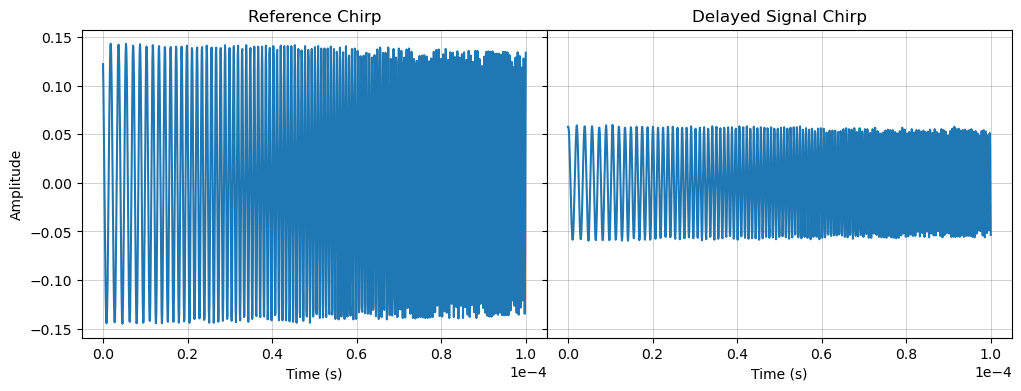

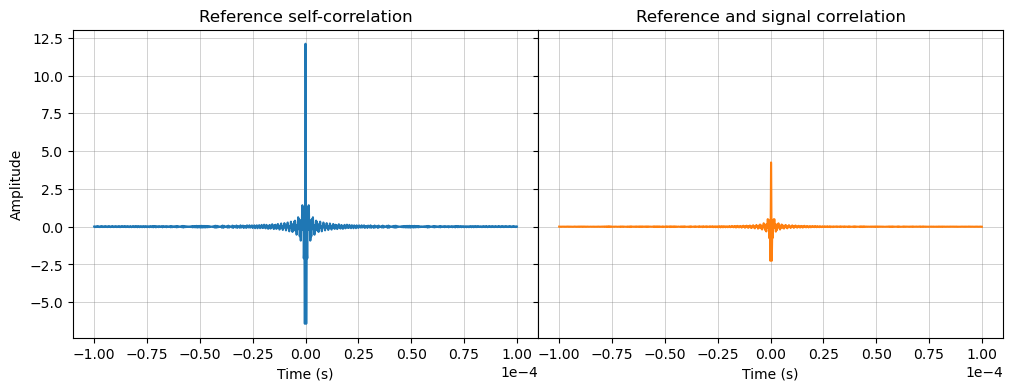

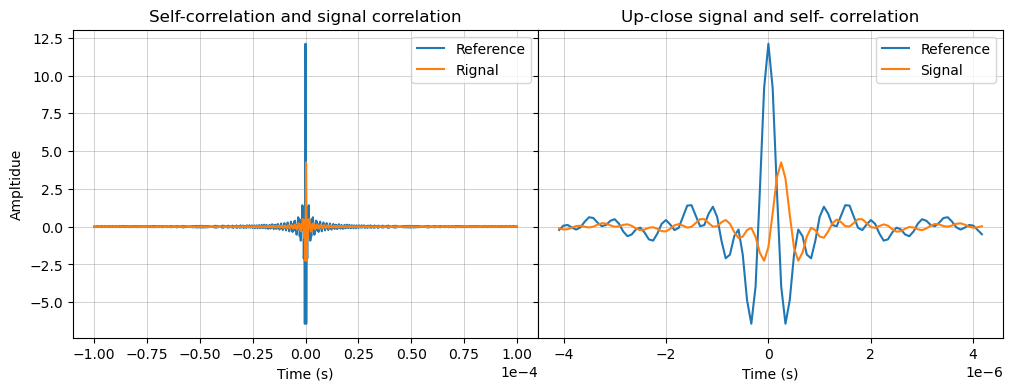

(array([ 7, 31, 36, 49, 62, 67, 91]), {'peak_heights': array([ 0.62617439,  1.4234246 ,  1.32189631, 12.11039066,  1.32189631,
        1.4234246 ,  0.62617439])})
(array([52]), {'peak_heights': array([4.25319099])})


In [15]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log12", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log12", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

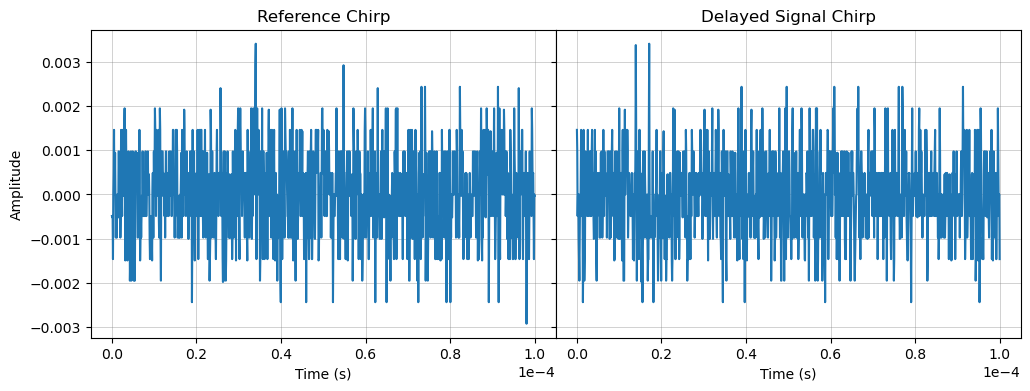

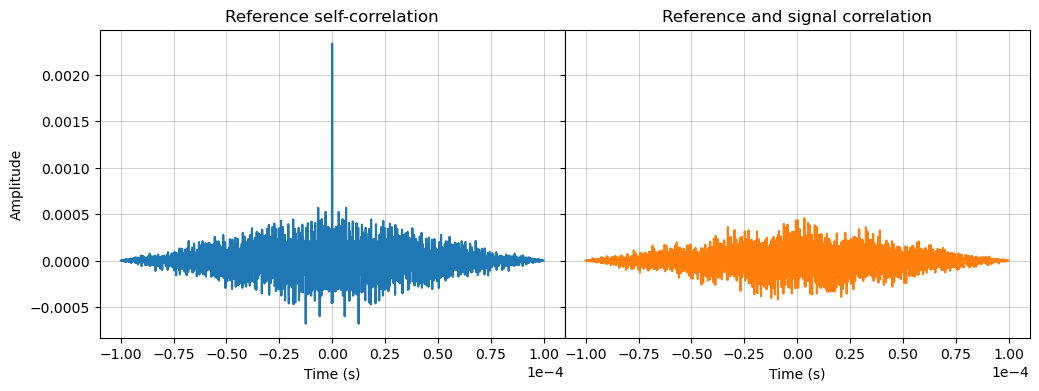

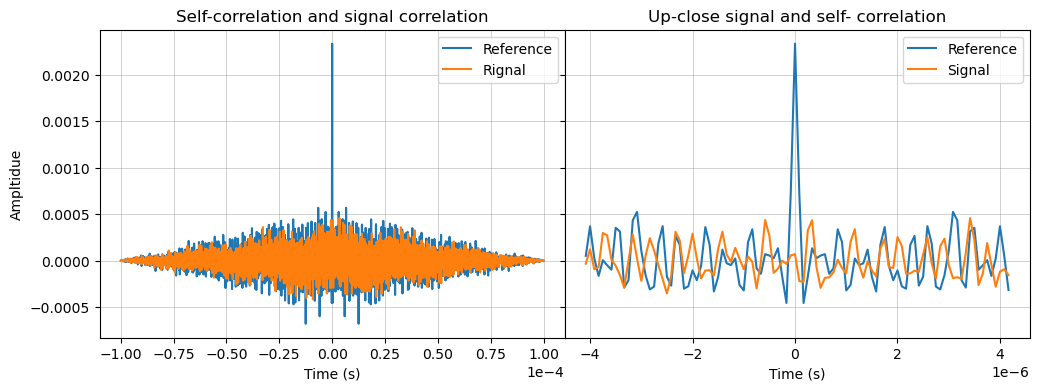

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [16]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log13", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log13", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

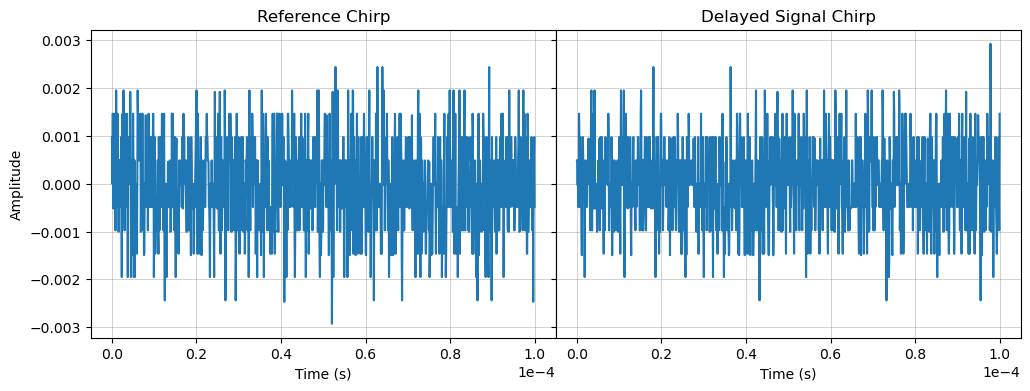

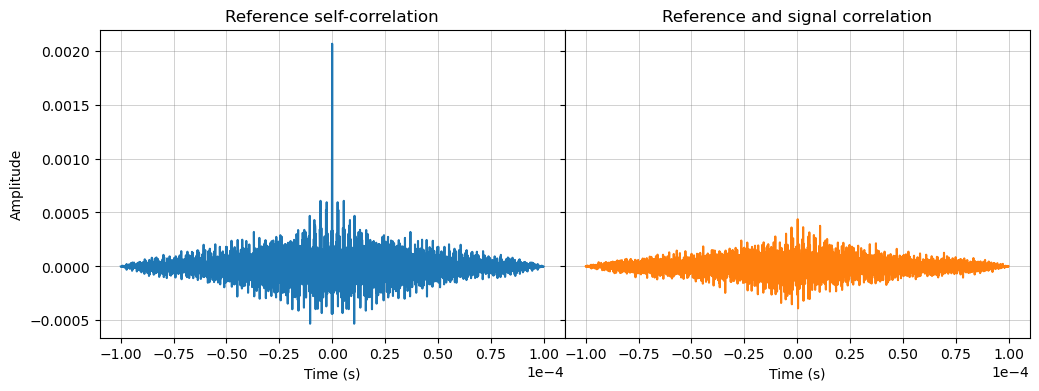

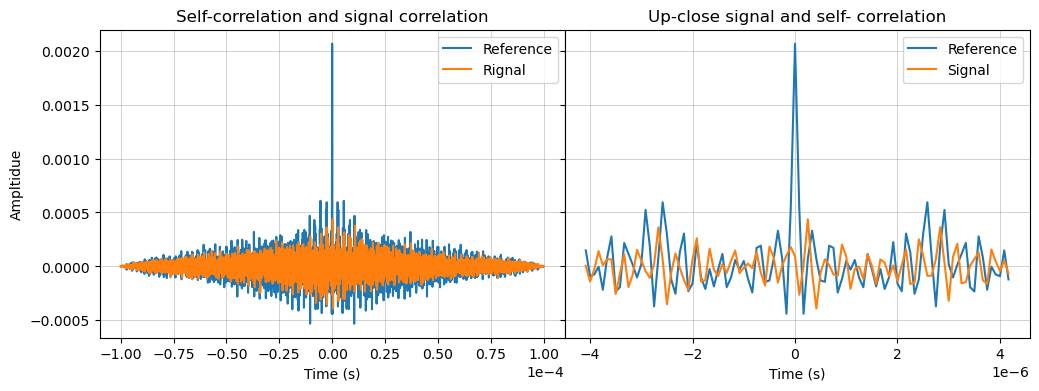

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [17]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log14", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log14", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)


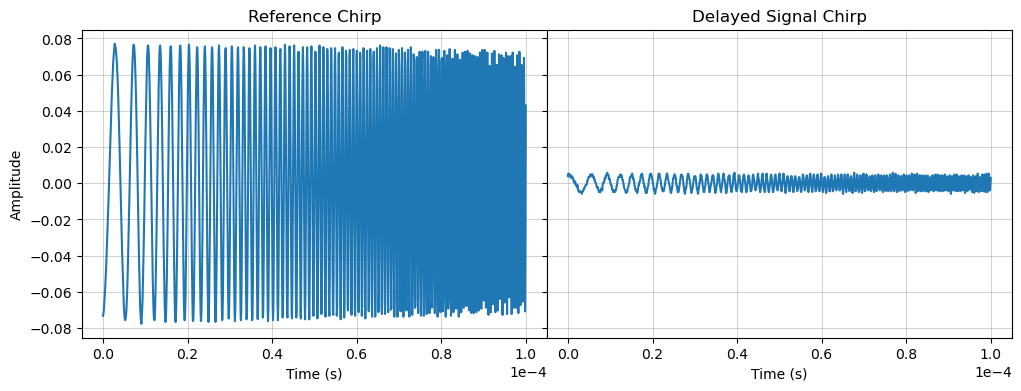

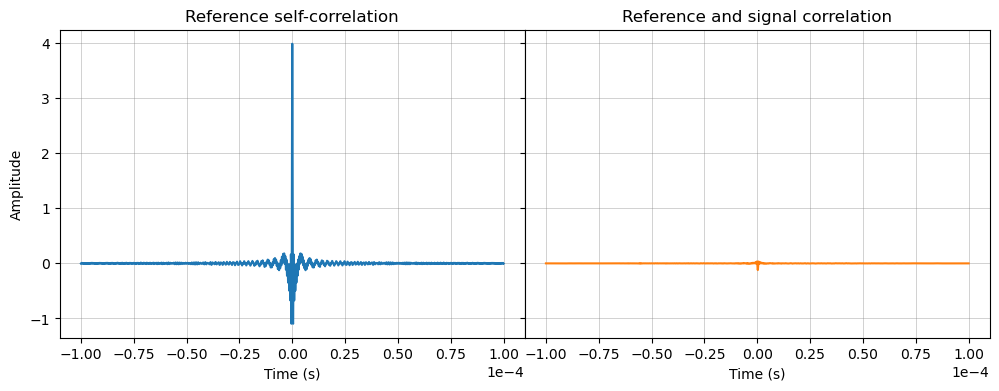

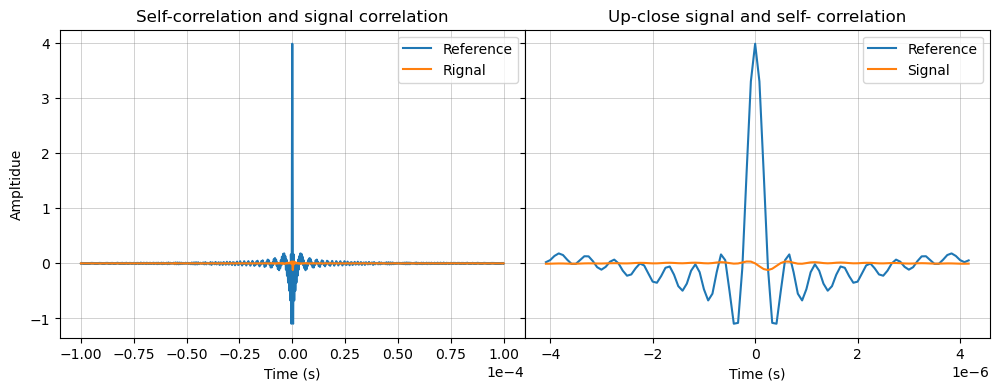

(array([49]), {'peak_heights': array([3.9910748])})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [18]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log15", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log15", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

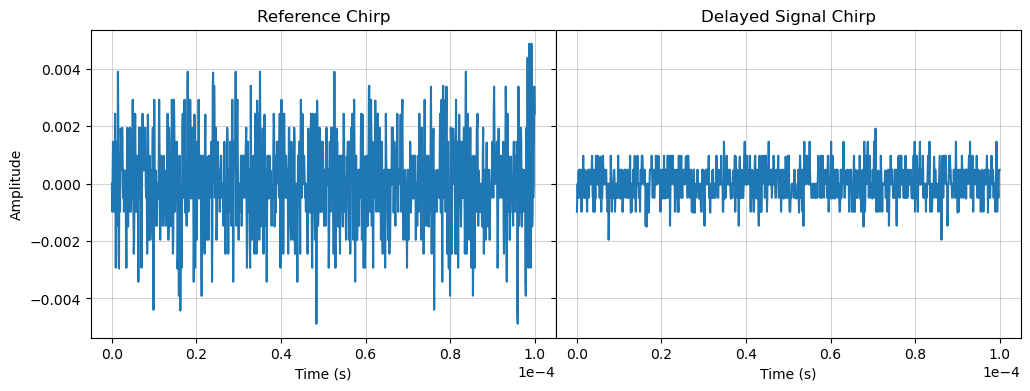

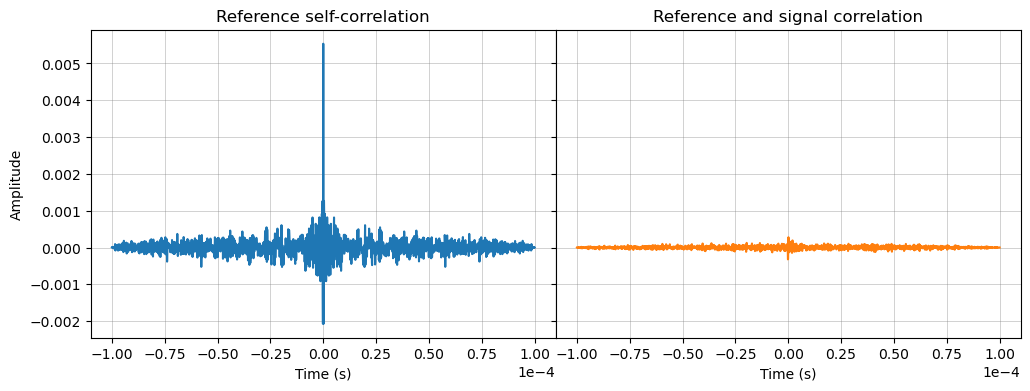

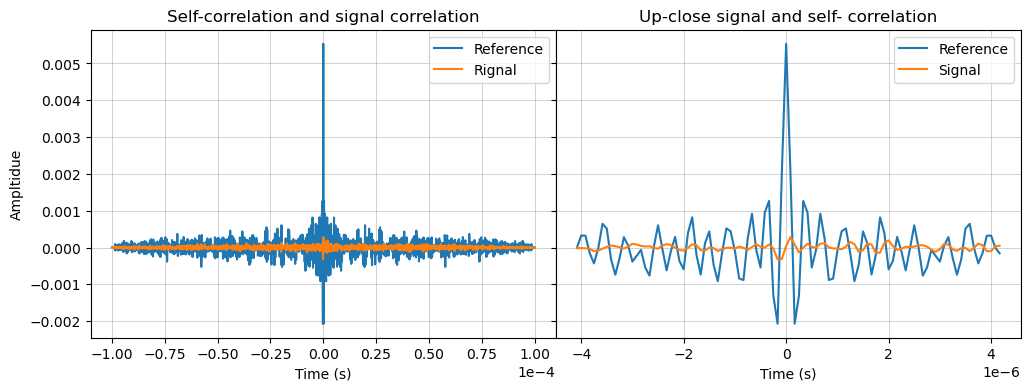

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [19]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log16", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log16", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

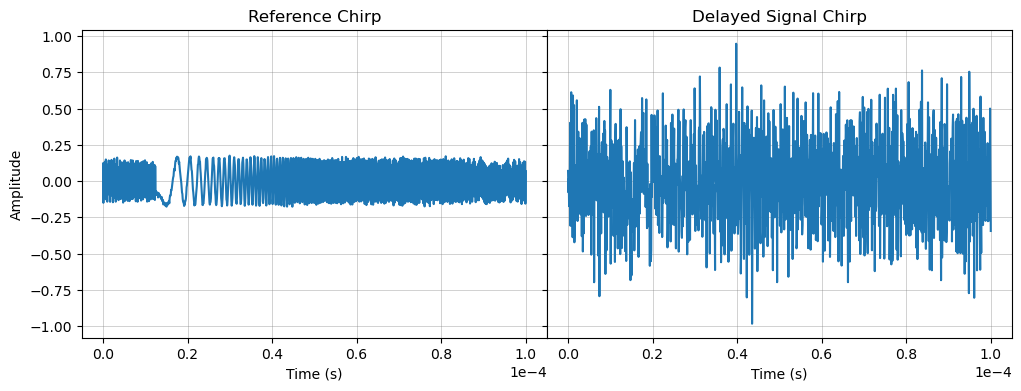

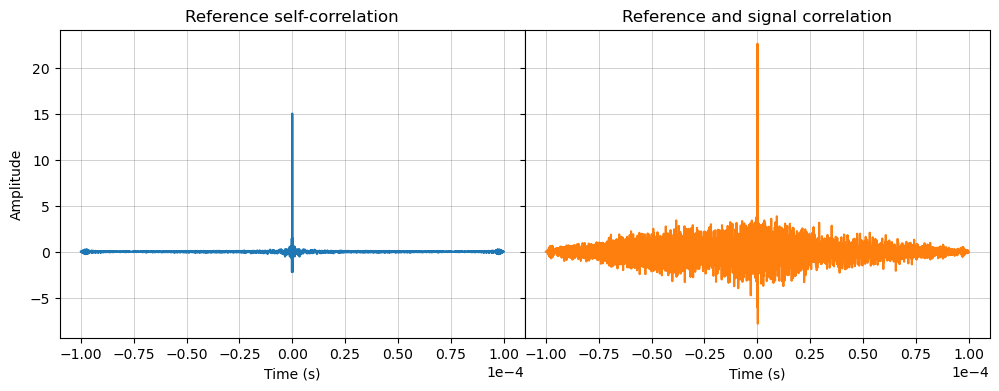

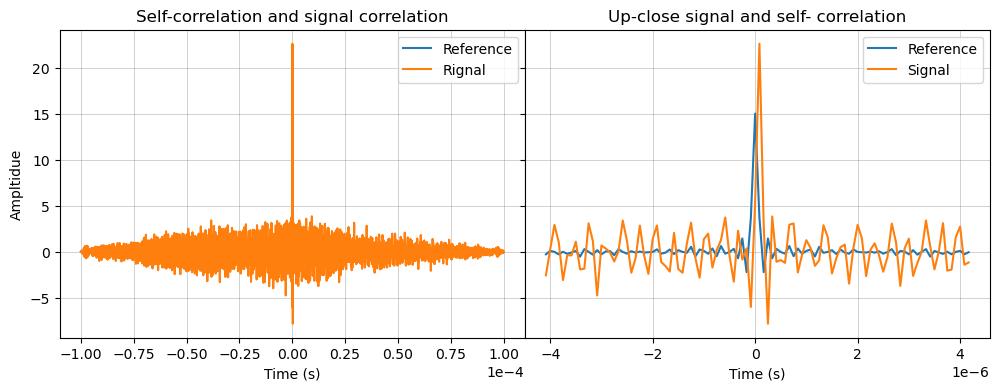

(array([34, 41, 46, 49, 52, 57, 64]), {'peak_heights': array([ 0.53877413,  0.62335968,  1.44829094, 15.0468874 ,  1.44829094,
        0.62335968,  0.53877413])})
(array([ 2,  7, 10, 13, 18, 22, 26, 30, 34, 38, 42, 45, 50, 53, 58, 61, 65,
       70, 73, 77, 81, 85, 89, 93, 97]), {'peak_heights': array([ 2.9236095 ,  1.09869742,  3.09433794,  0.69104862,  3.4007535 ,
        2.84709787,  2.86025453,  2.05354548,  3.16374373,  1.96897149,
        3.73469305,  2.27992392, 22.65022278,  3.84618211,  3.08175898,
        1.25699973,  2.88938618,  0.77957404,  2.91435909,  0.9150123 ,
        3.06917453,  1.4290359 ,  3.40832281,  3.1161418 ,  2.74284196])})


In [24]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log17", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log17", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

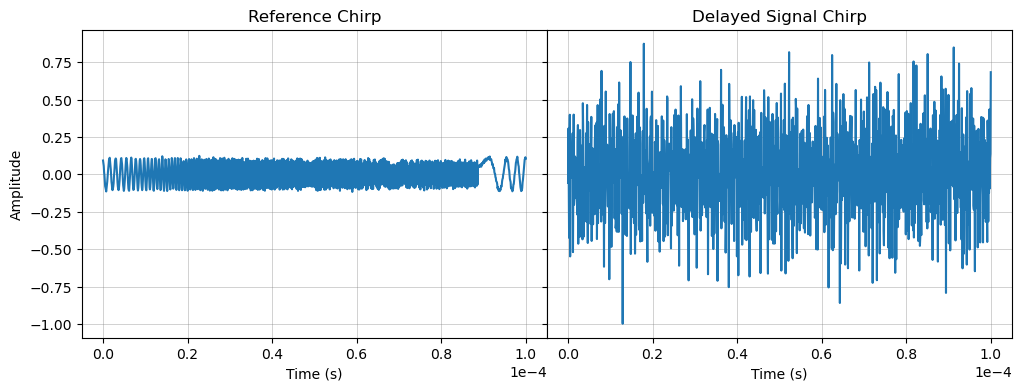

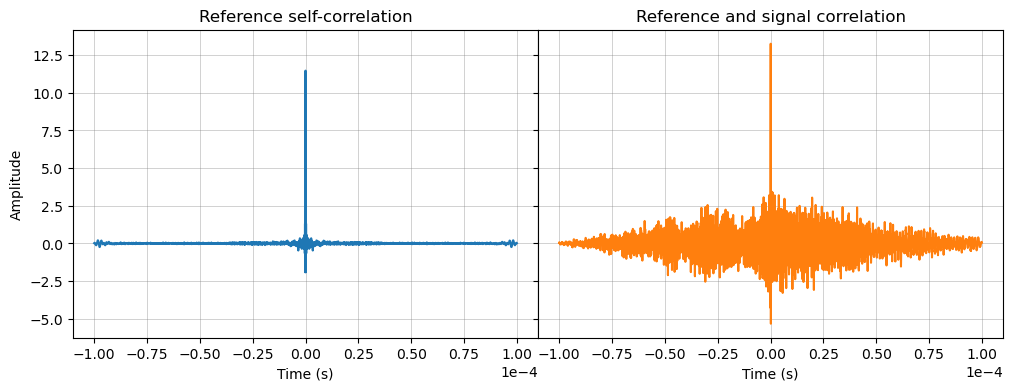

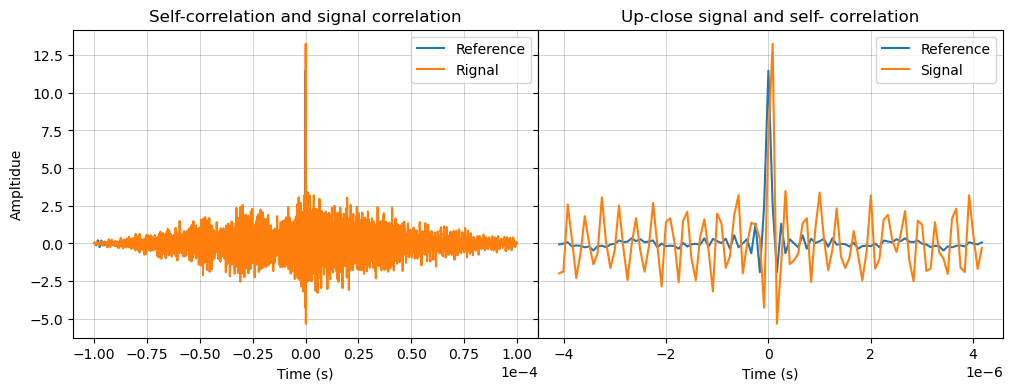

(array([41, 46, 49, 52, 57]), {'peak_heights': array([ 0.53893209,  1.30893278, 11.46726131,  1.30893278,  0.53893209])})
(array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 37, 42, 45, 50, 53, 58, 61, 65,
       69, 73, 77, 81, 84, 88, 93, 96]), {'peak_heights': array([ 2.58285475,  1.80448079,  3.05975676,  2.51766348,  1.6814239 ,
        2.68696308,  1.67527211,  2.10279894,  1.6045785 ,  1.97575259,
        3.20273066,  1.3752358 , 13.25305557,  3.47584152,  1.66845322,
        3.37939405,  2.32933068,  0.82235706,  3.18673134,  1.88986576,
        2.14410329,  1.51253581,  1.40966105,  2.30444312,  3.19864082])})


In [25]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log18", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log18", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

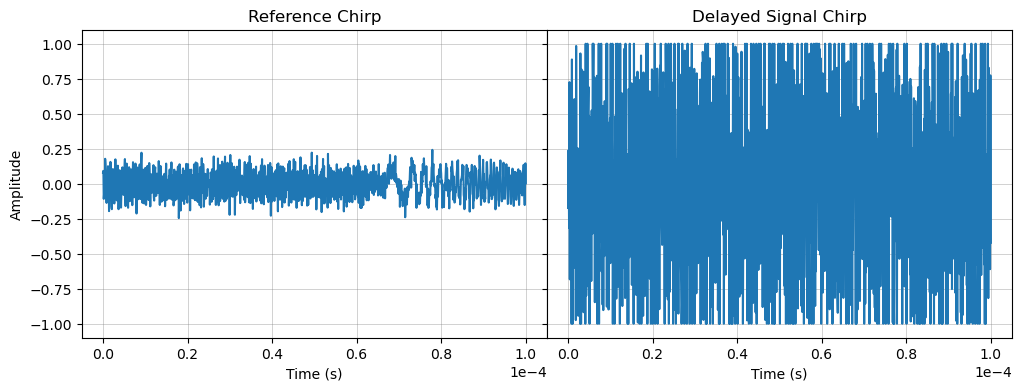

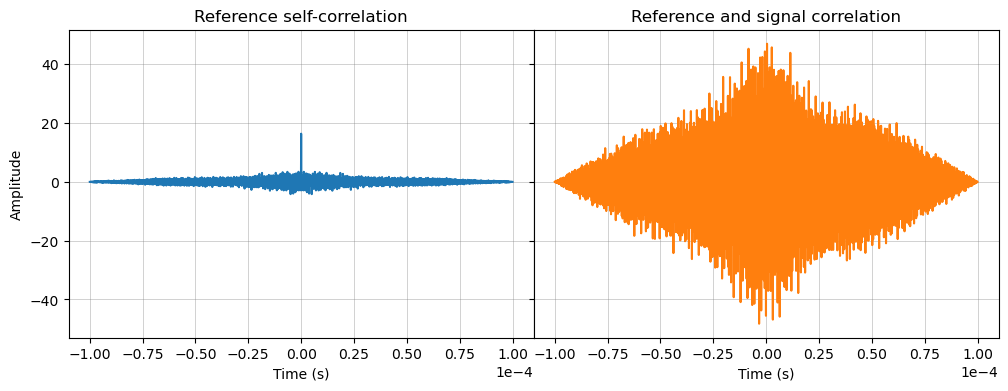

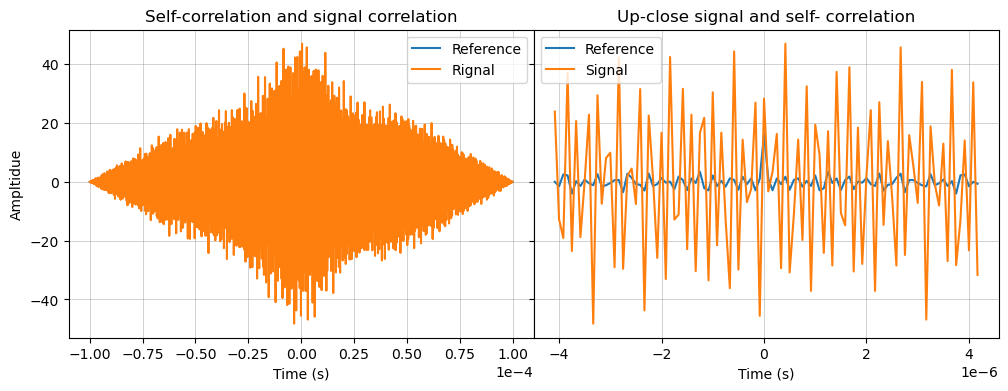

(array([ 2,  7, 10, 15, 17, 22, 25, 29, 32, 34, 37, 41, 44, 46, 49, 52, 54,
       57, 61, 64, 66, 69, 73, 76, 81, 83, 88, 91, 96]), {'peak_heights': array([ 2.53401232,  0.79209566,  2.60808611,  0.62915277,  2.77761126,
        2.84190607,  1.31373811,  1.80095387,  1.16671944,  3.42543077,
        2.17480278,  1.200495  ,  1.75162101,  1.17516255, 16.39266586,
        1.17516255,  1.75162101,  1.200495  ,  2.17480278,  3.42543077,
        1.16671944,  1.80095387,  1.31373811,  2.84190607,  2.77761126,
        0.62915277,  2.60808611,  0.79209566,  2.53401232])})
(array([ 3,  5,  8, 10, 13, 15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 39, 42,
       44, 47, 49, 52, 54, 57, 59, 61, 64, 66, 69, 71, 74, 76, 78, 81, 83,
       86, 88, 91, 93, 96, 98]), {'peak_heights': array([37.00645065, 20.68348694, 22.86212349, 29.46108246,  9.90938759,
       42.31344986,  4.51379061, 31.58079147, 22.56008148, 16.72524834,
       42.48478317, 31.66547394, 22.85024643, 21.80508804, 30.46862411,
       16.7

In [27]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log19", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log19", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

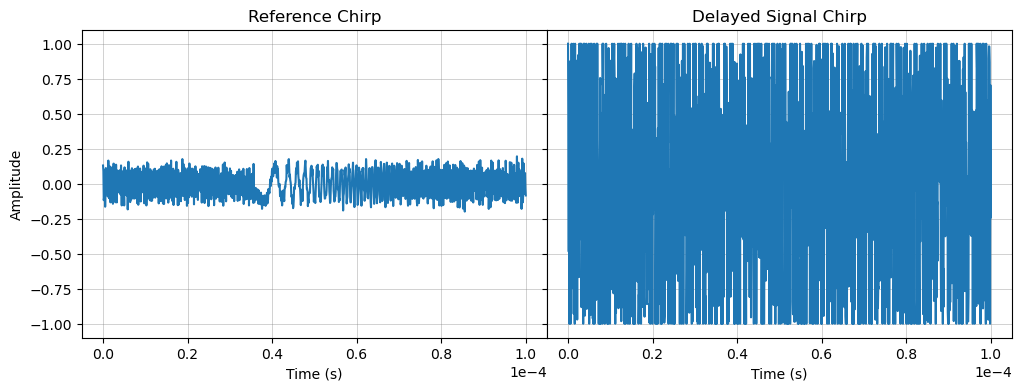

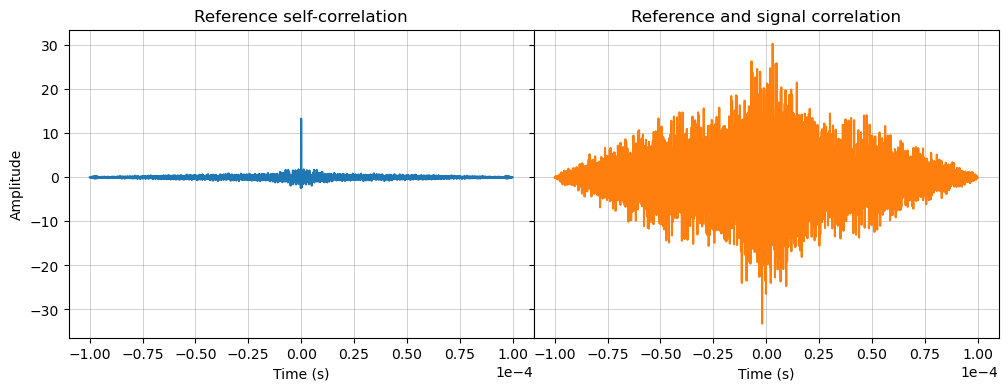

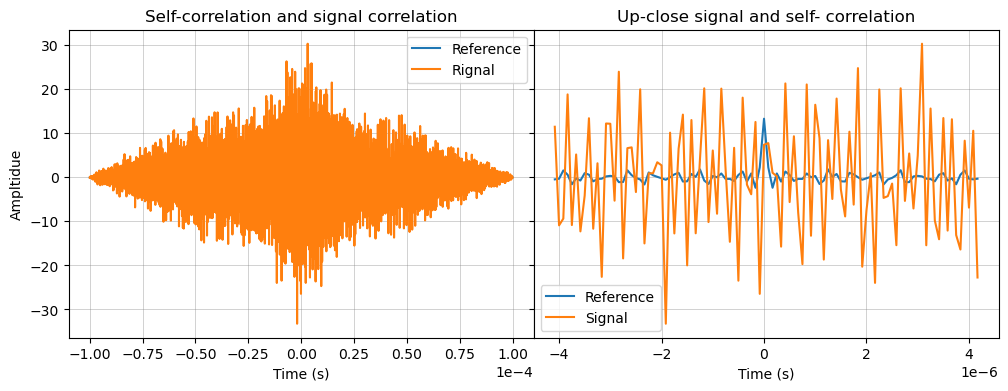

(array([ 2,  7, 17, 22, 29, 32, 34, 39, 44, 46, 49, 52, 54, 59, 64, 66, 69,
       76, 81, 91, 96]), {'peak_heights': array([ 1.56063545,  0.94441909,  1.61070883,  1.10887456,  1.02277553,
        0.75879252,  1.80271029,  0.87618428,  1.32138014,  0.87806374,
       13.30837536,  0.87806374,  1.32138014,  0.87618428,  1.80271029,
        0.75879252,  1.02277553,  1.10887456,  1.61070883,  0.94441909,
        1.56063545])})
(array([ 3,  5,  8, 10, 12, 15, 18, 20, 22, 24, 27, 30, 32, 35, 37, 39, 42,
       44, 47, 50, 54, 56, 59, 61, 64, 66, 69, 71, 74, 76, 81, 83, 86, 88,
       91, 93, 96, 98]), {'peak_heights': array([18.82401466,  5.18945408, 13.41772747,  3.18950677, 12.21858597,
       23.97357941,  6.80550671, 19.98041534,  0.92251009,  3.42516613,
       10.13877678, 14.23796654, 13.0072403 , 20.20754242,  6.09346914,
       20.13713074,  6.7006588 , 18.08833694, 12.57023239,  7.76904964,
       21.31525803,  9.32237434, 21.08078003, 16.47586823,  8.44700623,
       17.88177109

In [28]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log20", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log20", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

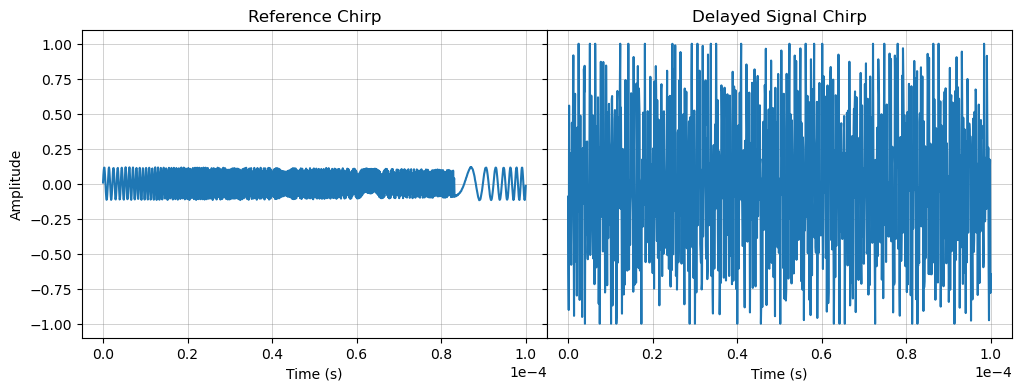

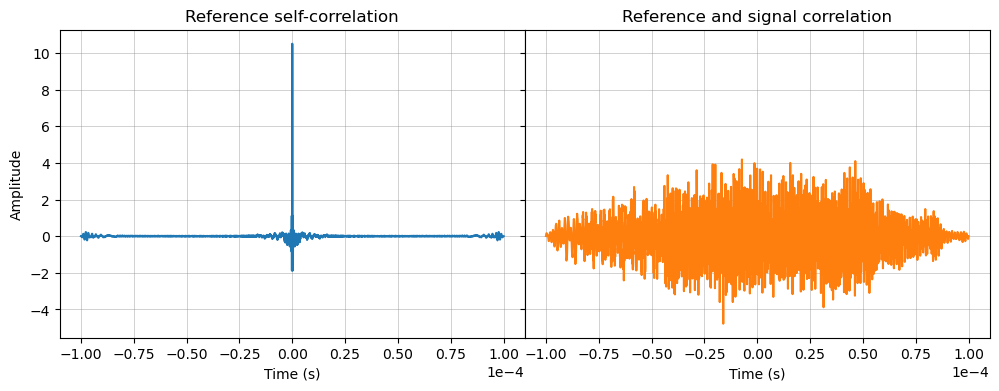

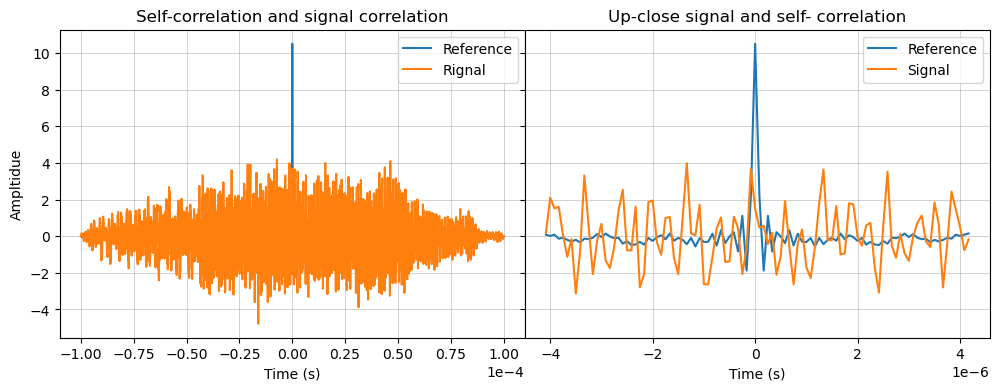

(array([46, 49, 52]), {'peak_heights': array([ 1.10845554, 10.50505161,  1.10845554])})
(array([ 1,  3,  9, 13, 18, 21, 25, 29, 33, 36, 41, 44, 48, 51, 56, 65, 68,
       71, 76, 80, 88, 91, 95]), {'peak_heights': array([2.09953809, 1.60125911, 3.31590366, 0.67165589, 2.53167534,
       1.60572433, 1.94622779, 1.04519045, 3.98330021, 1.71768212,
       1.02133119, 1.05986953, 3.68534136, 0.56502587, 1.91526186,
       3.64554262, 1.64047098, 1.79880977, 0.72546875, 3.5191586 ,
       1.12407565, 1.84165156, 2.43059421])})


In [29]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log21", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log21", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

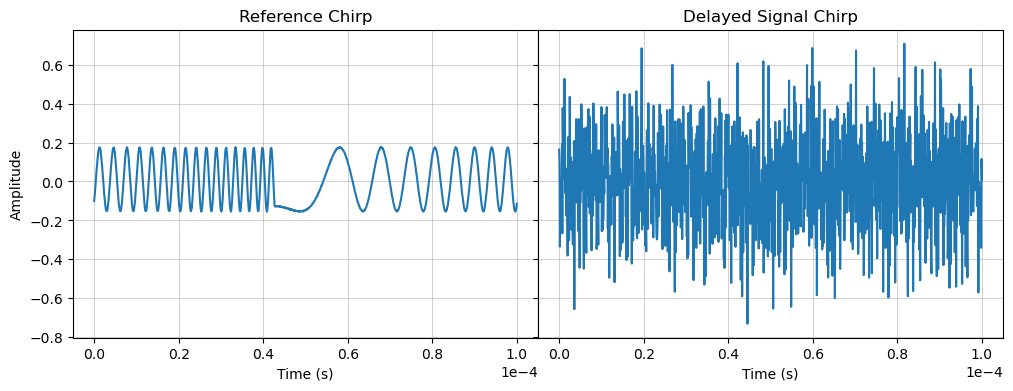

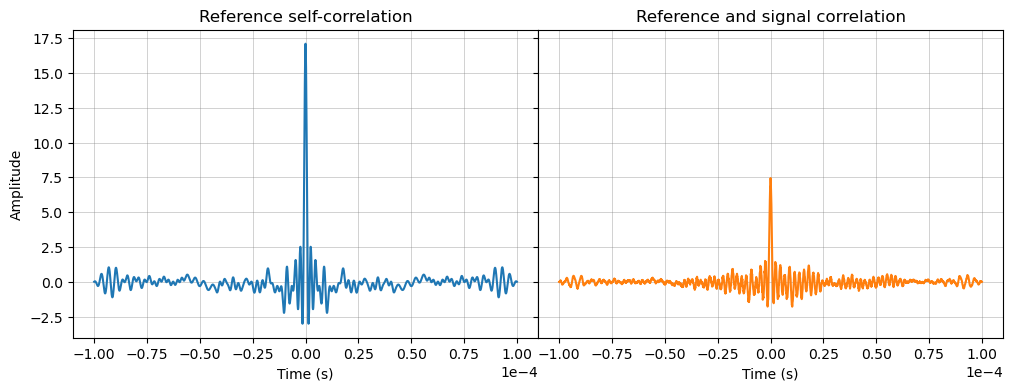

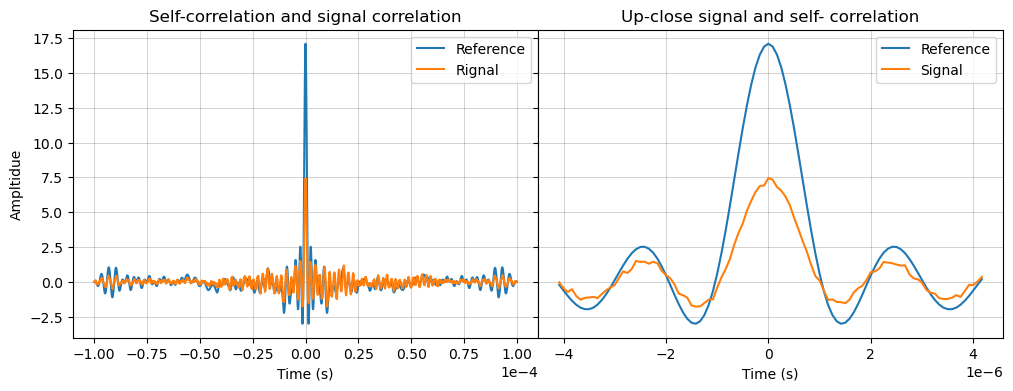

(array([20, 49, 78]), {'peak_heights': array([ 2.52085924, 17.09132576,  2.52085924])})
(array([15, 18, 20, 22, 49, 76, 81]), {'peak_heights': array([0.75660467, 1.50132167, 1.45628011, 1.44523942, 7.44916439,
       1.42980337, 1.18763304])})


In [31]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log22", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log22", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

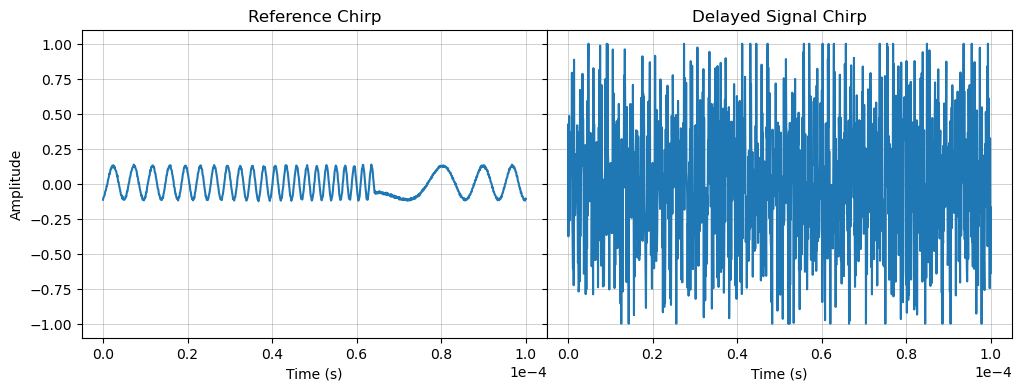

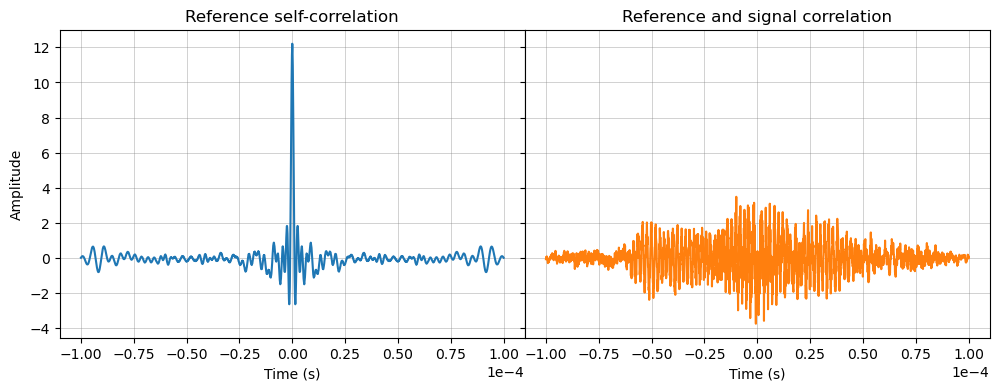

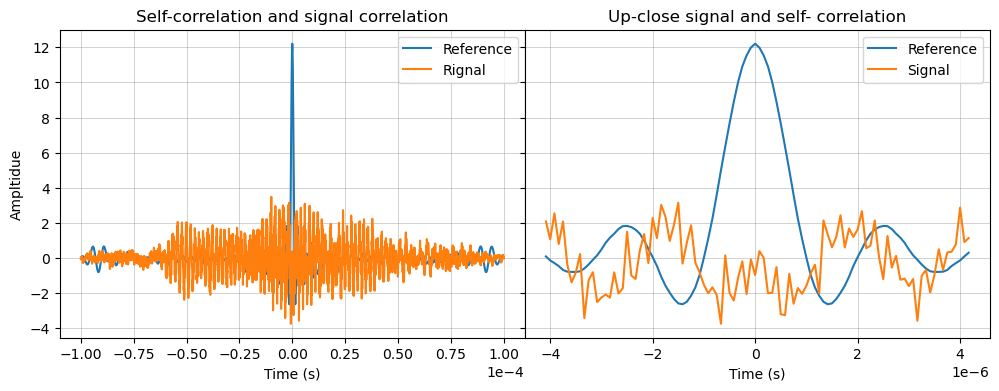

(array([19, 49, 79]), {'peak_heights': array([ 1.83109975, 12.20828629,  1.83109975])})
(array([ 2,  4, 19, 23, 25, 27, 31, 34, 65, 69, 71, 74, 77, 80, 92, 97]), {'peak_heights': array([2.54806185, 2.08338952, 1.49937057, 1.36906755, 2.28298759,
       3.02914762, 3.14966321, 1.8711139 , 2.14121962, 2.43762922,
       1.68256009, 2.67593908, 2.14242005, 1.25752759, 0.5030973 ,
       2.86842632])})


In [32]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log23", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log23", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

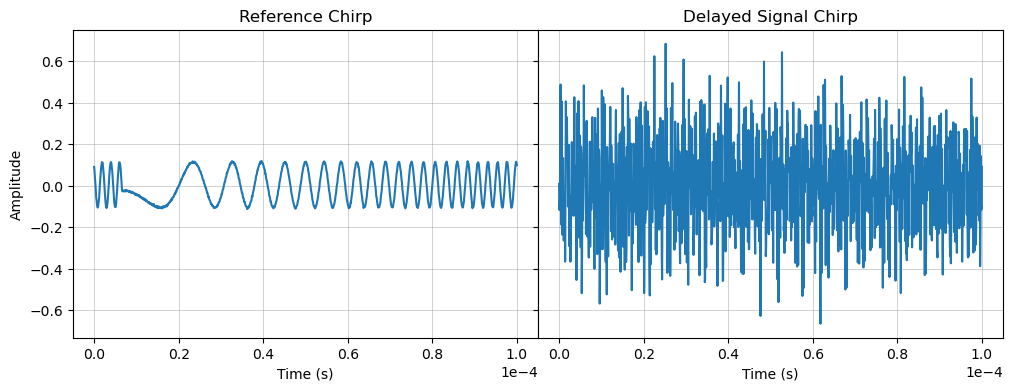

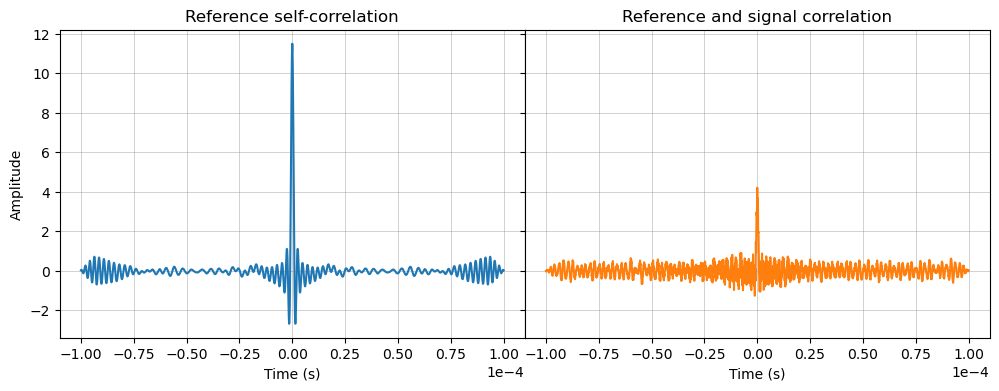

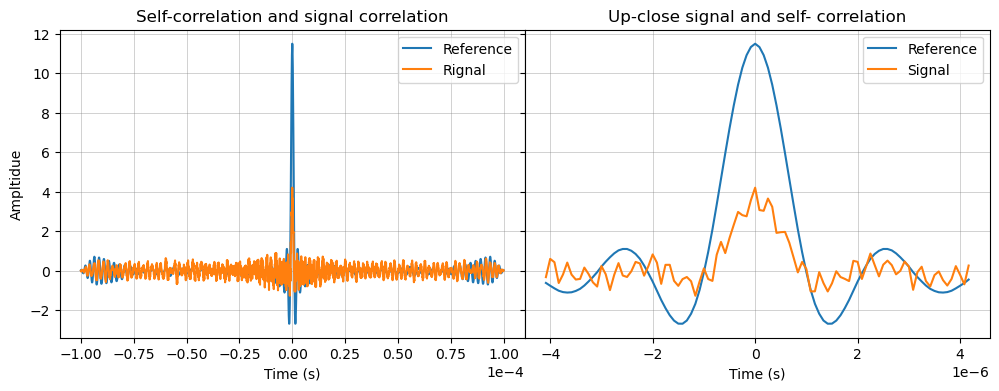

(array([19, 49, 79]), {'peak_heights': array([ 1.09342349, 11.48831367,  1.09342349])})
(array([ 1, 25, 41, 45, 49, 52, 56, 76, 80]), {'peak_heights': array([0.59151983, 0.81822419, 1.45278084, 2.96899271, 4.19791937,
       3.64783645, 1.95828426, 0.86318487, 0.50347632])})


In [41]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log24", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log24", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

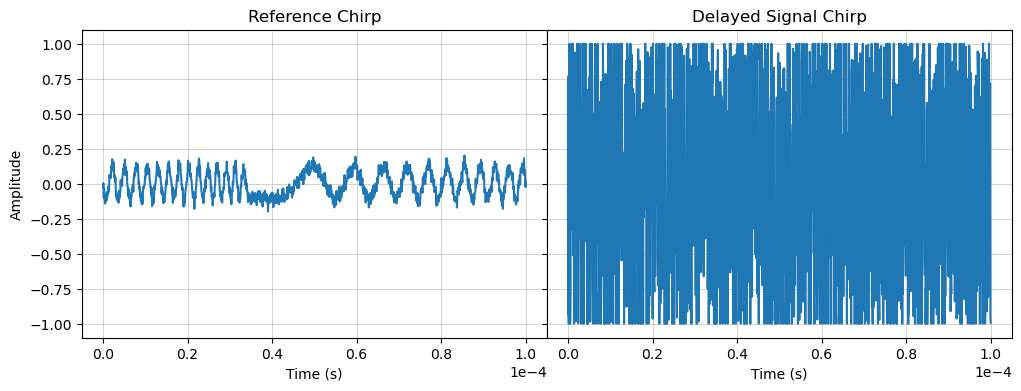

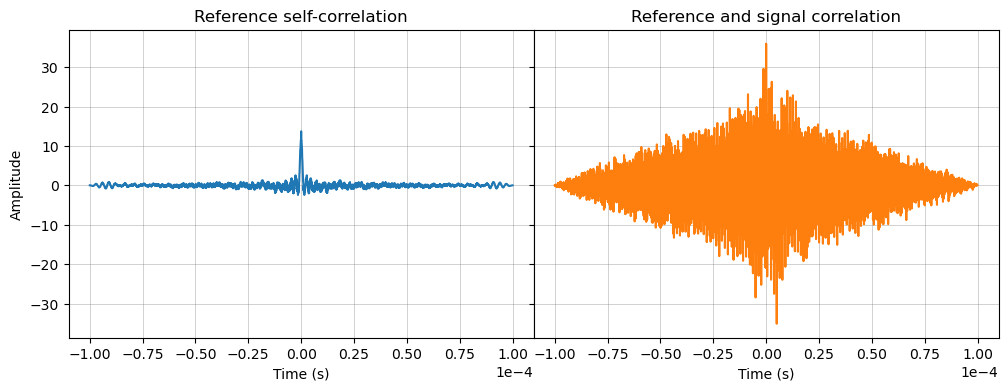

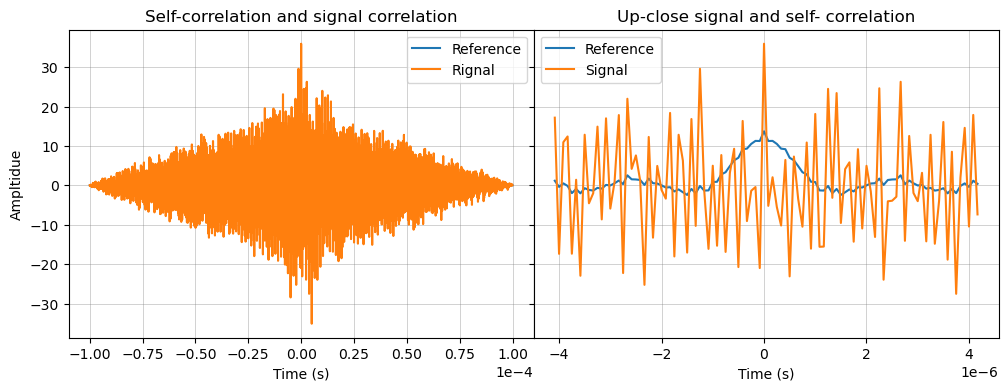

(array([15, 17, 22, 47, 49, 51, 76, 81, 83, 98]), {'peak_heights': array([ 1.21789956,  2.53528309,  1.7137574 , 11.2753191 , 13.70856953,
       11.2753191 ,  1.7137574 ,  2.53528309,  1.21789956,  1.16757309])})
(array([ 3,  5,  7, 10, 12, 15, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42,
       44, 49, 51, 54, 56, 59, 61, 64, 66, 69, 71, 73, 76, 81, 83, 86, 88,
       91, 93, 96, 98]), {'peak_heights': array([12.39601803,  1.41340768, 12.84030724, 14.89176559, 16.99900818,
       17.83075523, 21.96608543,  7.59023809, 12.27401447,  4.91797256,
       18.37125587, 12.82836723, 16.82440948, 29.57825089,  4.97343159,
        7.68062019,  9.27518463, 16.33394051, 35.93215942,  2.04173946,
        6.43722725,  7.29735184, 10.86248398, 18.10888672, 24.47433472,
       23.40816498,  5.82943058,  9.17407322,  4.9432621 , 24.62542725,
       26.27472687, 12.52335548,  3.16569185, 12.82201958, 16.06985664,
        8.52222347, 14.5847168 , 17.86148262])})


In [42]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log25", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log25", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

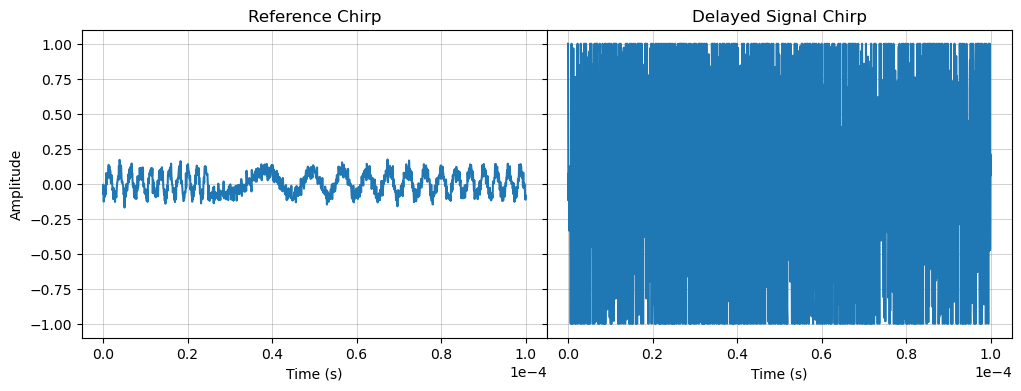

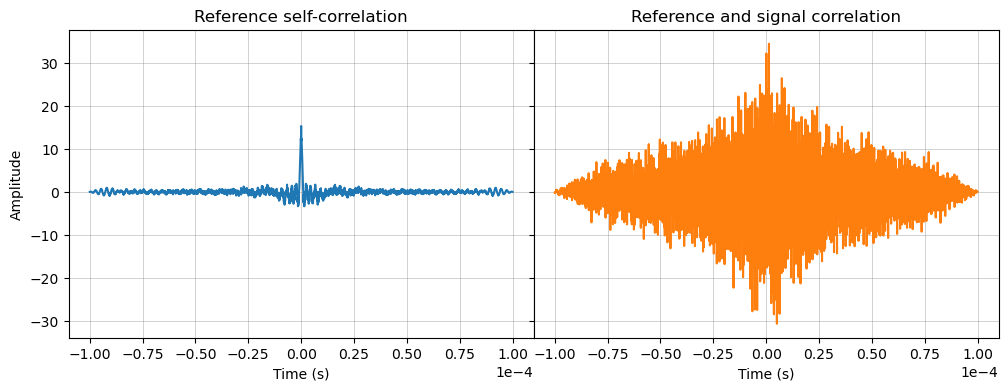

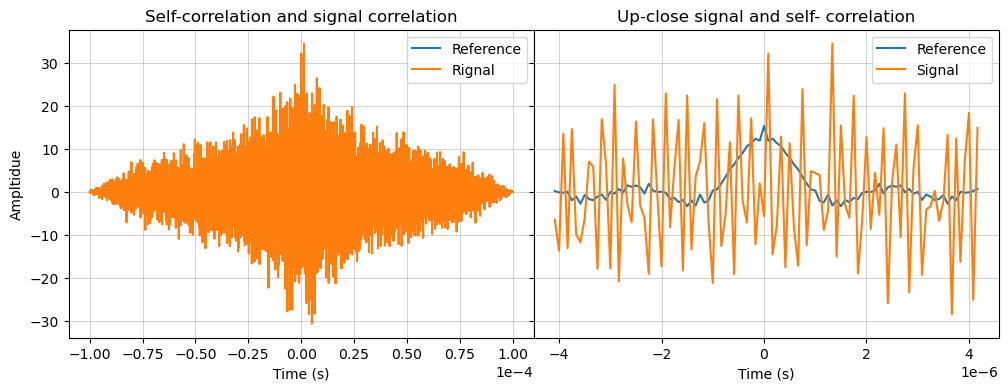

(array([15, 17, 19, 22, 47, 49, 51, 76, 79, 81, 83]), {'peak_heights': array([ 0.67695546,  1.52324438,  1.48599112,  1.88619339, 12.34743214,
       15.30426311, 12.34743214,  1.88619339,  1.48599112,  1.52324438,
        0.67695546])})
(array([ 2,  4,  8, 11, 14, 16, 19, 23, 26, 29, 31, 35, 38, 41, 43, 46, 48,
       50, 53, 55, 58, 60, 65, 67, 70, 73, 75, 77, 80, 82, 85, 92, 94, 97]), {'peak_heights': array([13.50529861, 14.6079998 ,  7.0223155 , 16.9058609 , 24.84715271,
        7.76620674, 16.38111496, 16.79944992, 22.84870911, 16.69372749,
       22.41044617, 15.96464729, 21.54288864, 11.52622604, 22.35771179,
       17.09648705,  1.96964741, 32.13471222, 12.84359169, 11.32478333,
       23.86127472,  4.81532192, 34.4187851 , 15.39997196, 22.33954239,
       12.7137661 ,  4.45143795, 14.77095699, 11.0182972 , 22.90668106,
       15.50286102, 13.26606941, 12.36675835, 18.33080673])})


In [35]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log26", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log26", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

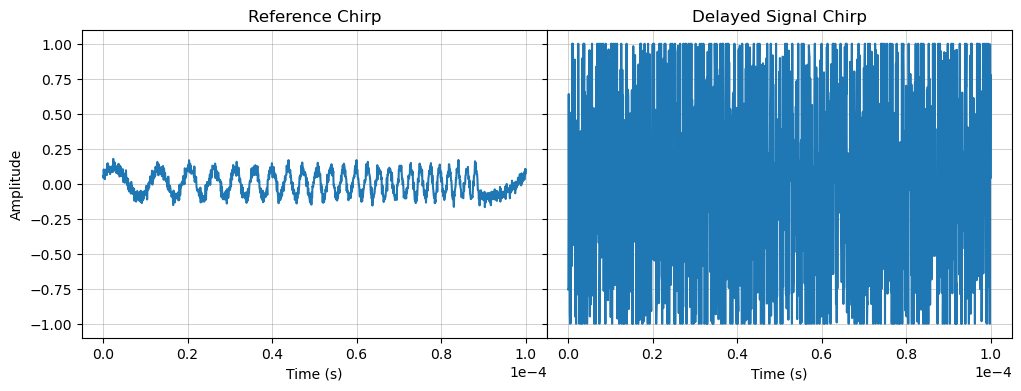

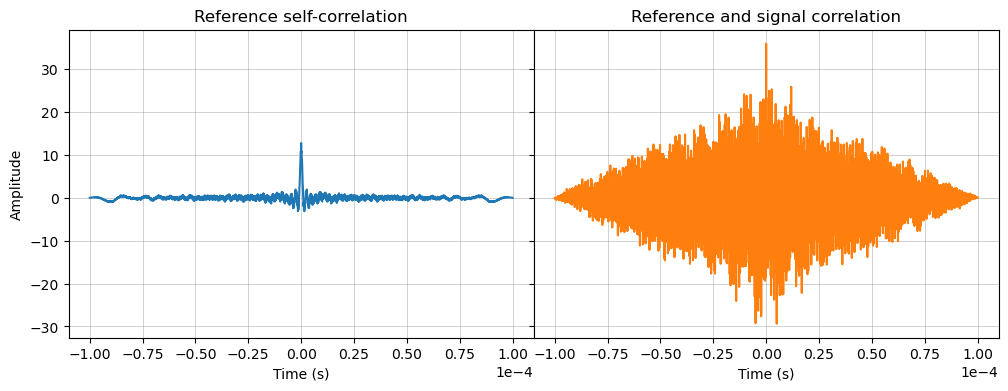

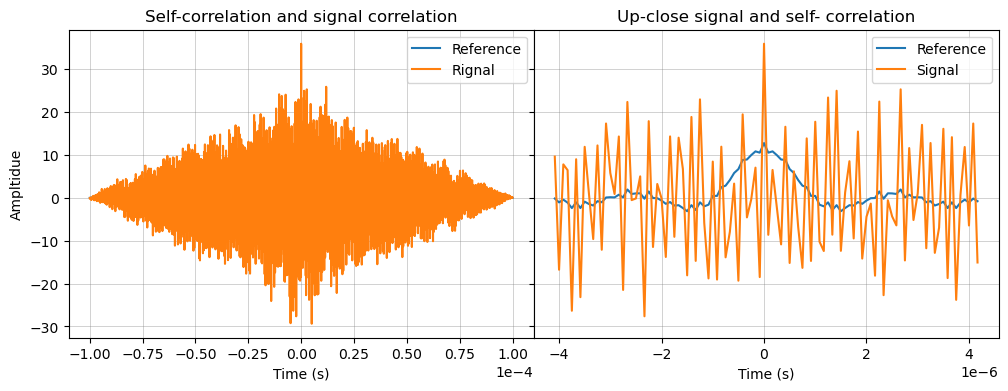

(array([15, 17, 20, 22, 47, 49, 51, 76, 78, 81, 83]), {'peak_heights': array([ 0.73570228,  1.94910097,  1.06407583,  1.49885154, 10.8527689 ,
       12.78858662, 10.8527689 ,  1.49885154,  1.06407583,  1.94910097,
        0.73570228])})
(array([ 2,  5,  7, 10, 12, 15, 17, 20, 22, 24, 27, 29, 32, 34, 37, 39, 42,
       44, 47, 49, 51, 54, 56, 59, 61, 64, 66, 69, 71, 76, 81, 83, 86, 88,
       91, 93, 96, 98]), {'peak_heights': array([ 7.81323624,  9.01280212, 11.9156971 , 12.2376442 , 17.35600281,
       14.32546997, 22.38523102,  5.01563644, 17.90084457,  3.2439971 ,
       14.3437767 , 14.04569054, 18.88311577, 22.98776245,  8.46764755,
       11.94437218,  3.32831812, 19.49114609,  7.05416775, 35.97607422,
        6.51258755, 16.59638405,  6.18318701, 13.88394165, 17.76676178,
       23.42098999, 25.00061035,  8.55404091, 15.48165703, 22.47187996,
       25.32961464, 11.62269402, 17.0417347 , 12.80154896, 16.12062645,
       14.16447639, 11.87236595, 17.35313416])})


In [36]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log27", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log27", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

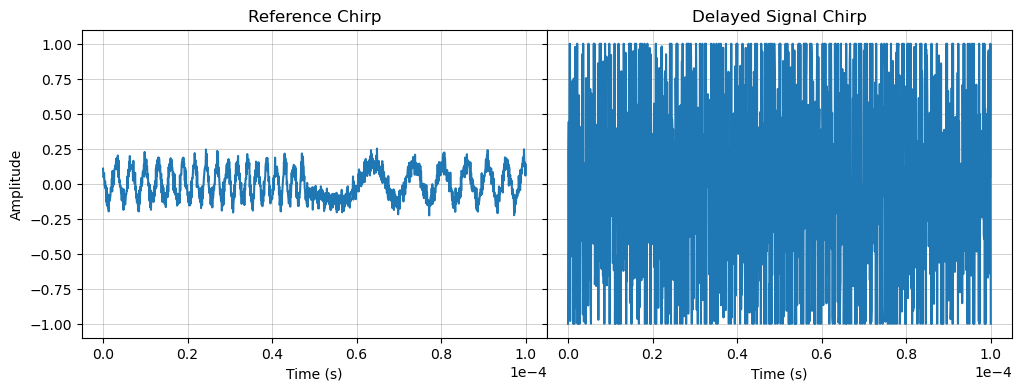

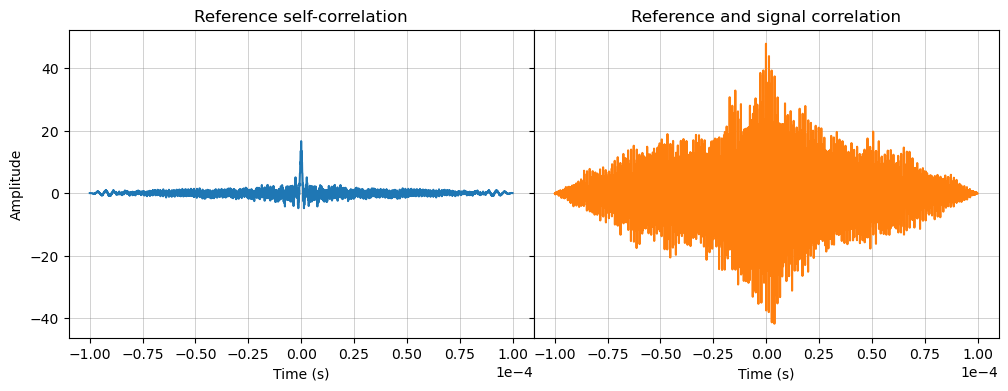

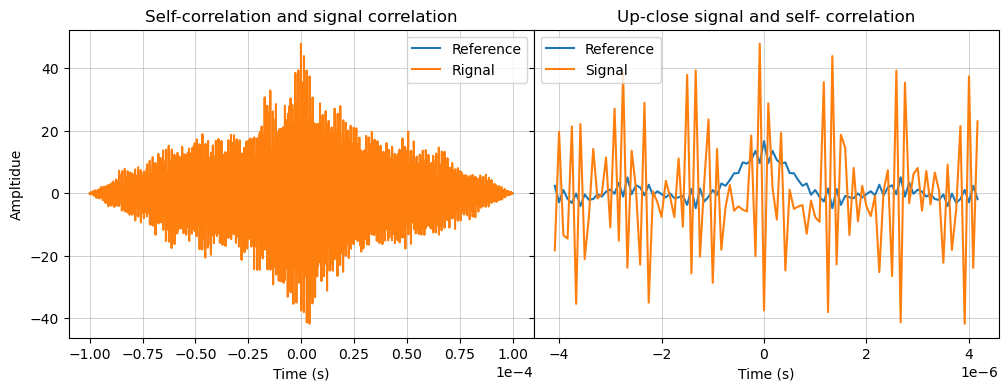

(array([ 2, 13, 15, 17, 19, 22, 24, 32, 34, 37, 39, 44, 47, 49, 51, 54, 59,
       61, 64, 66, 74, 76, 79, 81, 83, 85, 96, 98]), {'peak_heights': array([ 1.01567364,  1.12776911,  3.33592892,  5.06215811,  2.50575399,
        2.69494438,  0.60493124,  1.32637644,  1.4853071 ,  0.99260318,
        3.08453512,  9.8449707 , 13.54952145, 16.65417099, 13.54952145,
        9.8449707 ,  3.08453512,  0.99260318,  1.4853071 ,  1.32637644,
        0.60493124,  2.69494438,  2.50575399,  5.06215811,  3.33592892,
        1.12776911,  1.01567364,  2.36281013])})
(array([ 1,  4,  6,  9, 12, 14, 16, 18, 21, 23, 26, 29, 31, 33, 36, 38, 41,
       46, 48, 50, 53, 55, 63, 65, 67, 70, 72, 78, 80, 82, 85, 87, 89, 92,
       95, 97]), {'peak_heights': array([19.63485718, 21.38872528, 22.12568283, 14.14162064, 11.44839478,
       27.07082748, 38.53635788, 13.62445641, 28.94723892,  0.54541826,
        3.95989084, 11.13505173, 37.90408325, 39.33237457, 23.63042831,
       14.13736534,  2.61158109, 18.46383667

In [43]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log28", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log28", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)